In [94]:
# Importing all libraries required.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings due to version problems
import warnings
warnings.filterwarnings('ignore')

# to view all columns in dataset
pd.set_option('display.max_columns', None)

In [93]:
# reading dataset
loan = pd.read_csv("loan.csv")

# to get size of dataset
print(loan.shape)

# observation:there are 39717 rows and 111 columns in dataset

(39717, 111)


In [95]:
# to get info of dataset
print(loan.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None


In [96]:
# to get all features in dataset
print(loan.columns)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)


In [5]:
loan.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0   10.65%       162.87     B        B2                       NaN  10+ years   
1   15.27%        59.83     C        C4                     Ryder   < 1 year   
2   15.96%        84.33     C        C5                       NaN  10+ years   
3   13.49%       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-11   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   
2           RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-11   Fully Paid   
4           RENT     80000.0     Source Verified  Dec-11      Current   

  pymnt_plan                                                url  \
0          n  https://lendingclub.com/browse/loanDetail.acti...   
1          n  https://lendingclub.com/browse/loanDetail.acti...   
2          n  https://lendingclub.com/browse/loanDetail.acti...   
3          n  https://lendingclub.com/browse/loanDetail.acti...   
4          n  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65            0   
1                  bike    309xx         GA   1.00            0   
2  real estate business    606xx         IL   8.72            0   
3              personel    917xx         CA  20.00            0   
4              Personal    972xx         OR  17.94            0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85               1                     NaN   
1           Apr-99               5                     NaN   
2           Nov-01               2                     NaN   
3           Feb-96               1                    35.0   
4           Jan-96               0                    38.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc  \
0                     NaN         3        0      13648     83.70%          9   
1                     NaN         3        0       1687      9.40%          4   
2                     NaN         2        0       2956     98.50%         10   
3                     NaN        10        0       5598        21%         37   
4                     NaN        15        0      27783     53.90%         38   

  initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0                   f       0.00           0.00   5863.155187   
1                   f       0.00           0.00   1008.710000   
2                   f       0.00           0.00   3005.666844   
3                   f       0.00           0.00  12231.890000   
4                   f     524.06         524.06   3513.330000   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0          5833.84          5000.00         863.16     

Data Cleaning

checking duplicates in dataset

In [6]:
# checking duplicates in dataset based on id
duplicate_check = loan[loan.duplicated(subset='id', keep='first')]
duplicate_check.shape

# observation:there is no repeated row in dataset

(0, 111)

To check missing values

In [97]:
loan.isnull().sum()

# observation:some features have all null values 

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [8]:
# To check which are columns have all null values
total_null =[feature for feature in loan.columns if loan[feature].isnull().sum() == 39717]
total_null


['mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'tot_hi_cred_lim',
 'total_bal

In [9]:
# to check integer location of columns which have all empty values
for i in total_null:
    print(loan.columns.get_loc(i))
    
## observation columns from 53 to 105 will be emptys
# hence its droping

50
53
54
55
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
107
108
109
110


In [10]:
# drop the columns which have all null values
loan.drop(loan.iloc[:,53:105],axis=1,inplace=True)
loan.shape

(39717, 59)

In [11]:
# to check null values in dataset
loan.isnull().sum()  

id                                 0
member_id                          0
loan_amnt                          0
funded_amnt                        0
funded_amnt_inv                    0
term                               0
int_rate                           0
installment                        0
grade                              0
sub_grade                          0
emp_title                       2459
emp_length                      1075
home_ownership                     0
annual_inc                         0
verification_status                0
issue_d                            0
loan_status                        0
pymnt_plan                         0
url                                0
desc                           12940
purpose                            0
title                             11
zip_code                           0
addr_state                         0
dti                                0
delinq_2yrs                        0
earliest_cr_line                   0
i

In [12]:
#drop additional columns which have most empty values
columns_drop_list1 = ["tot_hi_cred_lim","total_bal_ex_mort","total_bc_limit","total_il_high_credit_limit","mths_since_last_major_derog","next_pymnt_d"]
loan.drop(labels=columns_drop_list1,axis=1,inplace=True)

In [13]:
loan.shape

(39717, 53)

In [14]:
#drop additional columns which have most empty values
columns_drop_list2 =["desc","mths_since_last_delinq","mths_since_last_record"] 
loan.drop(labels=columns_drop_list2,axis=1,inplace=True)

In [15]:
# dropping id and memerid since its not required for analysis
columns_drop_list3 =["id","member_id"] 
loan.drop(labels=columns_drop_list3,axis=1,inplace=True)
loan.shape

(39717, 48)

In [16]:
# emp_length columns null values changed to 0 for further analysis 
loan.emp_length.fillna("0",inplace=True)

loan.emp_length.isnull().sum()

0

In [17]:
# pub_rec_bankruptcies can be cleaned for further analysis.

loan.pub_rec_bankruptcies.fillna('Not Known',inplace=True)
print(loan.pub_rec_bankruptcies.isnull().sum())

0


In [18]:
# removing % in int_rate and revol_util columns
loan["revol_util"] = loan["revol_util"].str.rstrip("%")

In [19]:
loan["int_rate"] = loan["int_rate"].str.rstrip("%")

In [20]:
# lets analysis loan_status variable
loan["loan_status"].value_counts(normalize=True)


# observation:82% of loans also full paid
# only 2% only currently paying
#14% loans are not paid or charged off

Fully Paid     0.829620
Charged Off    0.141677
Current        0.028703
Name: loan_status, dtype: float64

In [21]:
# for our analysis only full paid and charged off considered as we analysis only default and non default applicant,current paying loan is not considered 
loan = loan[(loan["loan_status"] ==("Fully Paid")) | (loan["loan_status"] ==("Charged Off")) ]


In [22]:
loan.shape

# observation:loan status current is removed from dataset

(38577, 48)

Univariate analysis

In [23]:
loan["emp_length"]
loan['emp_length']=loan.emp_length.str.extract('(\d+)')
loan["emp_length"]

# to extract only numeric values in emp_length variable

0        10
1         1
2        10
3        10
5         3
         ..
39712     4
39713     3
39714     1
39715     1
39716     1
Name: emp_length, Length: 38577, dtype: object

In [24]:
#converting amount into numeric value for further quantitative analysis

cols = ['loan_amnt','funded_amnt','int_rate','funded_amnt_inv','installment','annual_inc','dti','emp_length','total_pymnt']
loan[cols] = loan[cols].apply(pd.to_numeric)

Univariate Quantitative(Numeric) feature analysis

In [25]:
# Basic statistics with int_rate variable
loan['int_rate'].describe()

#observation:maximum interest rate is 24.59%
# mean interest rate is 11.93%


count    38577.000000
mean        11.932219
std          3.691327
min          5.420000
25%          8.940000
50%         11.710000
75%         14.380000
max         24.400000
Name: int_rate, dtype: float64

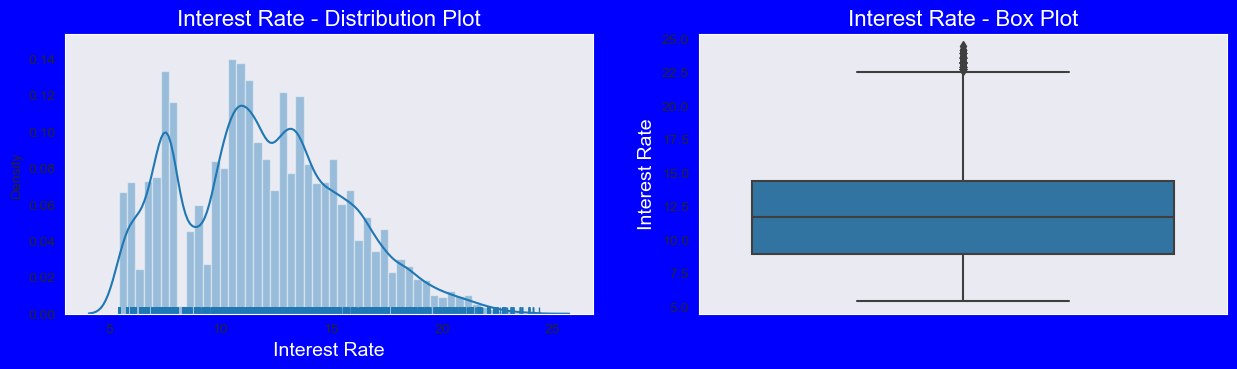

In [26]:
plt.figure(figsize=(15,8),facecolor='b')
sns.set_style("dark")
# subplot 1
plt.subplot(2, 2, 1)
ax = sns.distplot(loan['int_rate'],rug = True)
ax.set_title('Interest Rate - Distribution Plot',fontsize=16,color='w')
ax.set_xlabel('Interest Rate',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 2, 2)
ax = sns.boxplot(y=loan['int_rate'])
ax.set_title('Interest Rate - Box Plot',fontsize=16,color='w')
ax.set_ylabel('Interest Rate',fontsize=14,color='w')
plt.show()

# Observations :
# Below plots show that most of the Interest Rates on loans are in range of 10% - 15% 


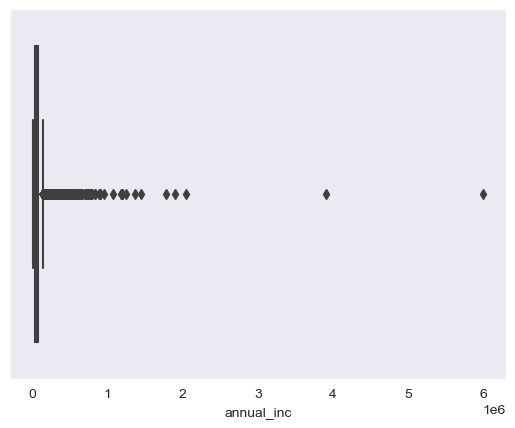

In [27]:
# Basic statistics with annual income variable
sns.boxplot(loan['annual_inc'])
plt.show()
#observation:there is outier in annul income variable



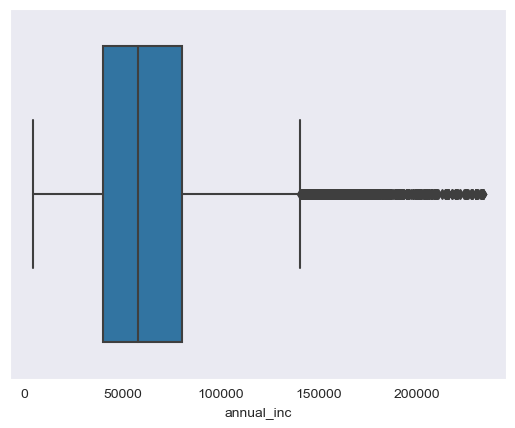

In [28]:
# removing outliers
loan =loan[loan["annual_inc"] < loan["annual_inc"].quantile(0.99)]
           
sns.boxplot(loan['annual_inc'])
plt.show()

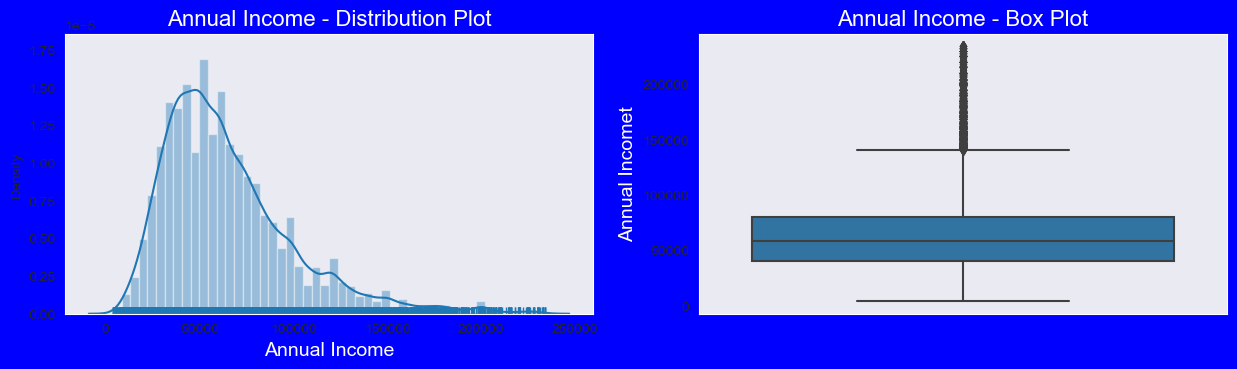

In [29]:
# Univariate Analysis on Annual Income-Quantitative Variables

plt.figure(figsize=(15,8),facecolor='b')
sns.set_style("dark")
# subplot 1
plt.subplot(2, 2, 1)
ax = sns.distplot(loan['annual_inc'],rug = True)
ax.set_title('Annual Income - Distribution Plot',fontsize=16,color='w')
ax.set_xlabel('Annual Income',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 2, 2)
ax = sns.boxplot(y=loan['annual_inc'])
ax.set_title('Annual Income - Box Plot',fontsize=16,color='w')
ax.set_ylabel('Annual Incomet',fontsize=14,color='w')
plt.show()

# Observations :
# Below plots show that most of the Loan amounts are in range of 5000 - 15000

In [30]:
loan['annual_inc'].describe()

# Observations :
# maximum annual income is 234000 and mean is 65313

count     38191.000000
mean      65313.610090
std       35150.773045
min        4000.000000
25%       40000.000000
50%       58000.000000
75%       80232.000000
max      234000.000000
Name: annual_inc, dtype: float64

In [31]:
loan['loan_amnt'].describe()

# Observations :
# maximum loan amount is 350000 and mean is 10962

count    38191.000000
mean     10962.265979
std       7266.157660
min        500.000000
25%       5200.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

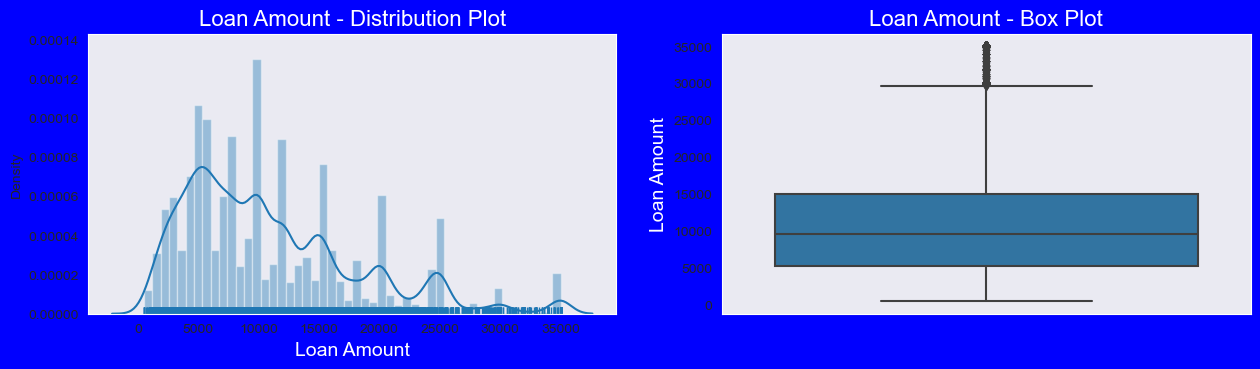

In [32]:
# Univariate Analysis on Loan amount-Quantitative Variables

plt.figure(figsize=(15,8),facecolor='b')
sns.set_style("dark")
# subplot 1
plt.subplot(2, 2, 1)
ax = sns.distplot(loan['loan_amnt'],rug = True)
ax.set_title('Loan Amount - Distribution Plot',fontsize=16,color='w')
ax.set_xlabel('Loan Amount',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 2, 2)
ax = sns.boxplot(y=loan['loan_amnt'])
ax.set_title('Loan Amount - Box Plot',fontsize=16,color='w')
ax.set_ylabel('Loan Amount',fontsize=14,color='w')
plt.show()

# Observations :
# Below plots show that most of the Loan amounts are in range of 5000 - 15000

In [33]:
loan['funded_amnt'].describe()

count    38191.000000
mean     10703.329973
std       7011.076206
min        500.000000
25%       5100.000000
50%       9500.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

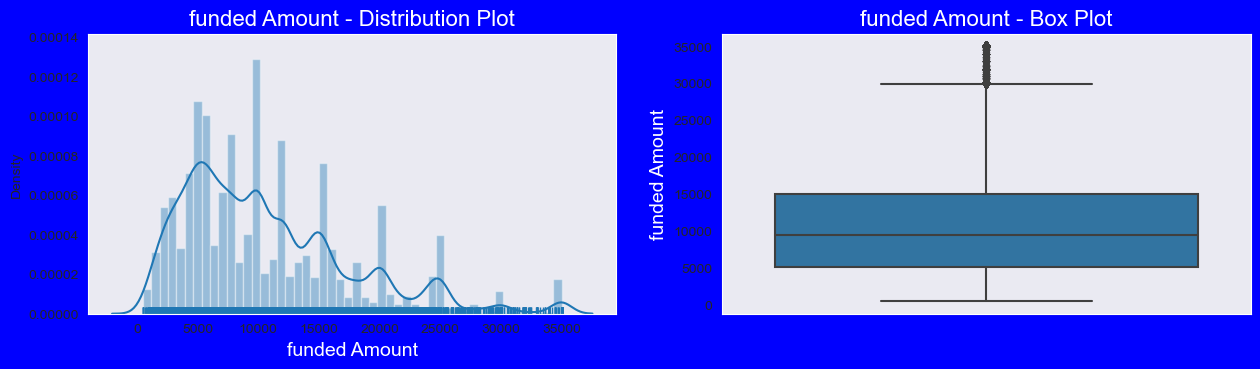

In [34]:
# Univariate Analysis on funded amount-Quantitative Variables

plt.figure(figsize=(15,8),facecolor='b')
sns.set_style("dark")
# subplot 1
plt.subplot(2, 2, 1)
ax = sns.distplot(loan['funded_amnt'],rug = True)
ax.set_title('funded Amount - Distribution Plot',fontsize=16,color='w')
ax.set_xlabel('funded Amount',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 2, 2)
ax = sns.boxplot(y=loan['funded_amnt'])
ax.set_title('funded Amount - Box Plot',fontsize=16,color='w')
ax.set_ylabel('funded Amount',fontsize=14,color='w')
plt.show()

# Observations :
# Below plots show that most of the Loan amounts are in range of 5000 - 15000

In [35]:
loan['funded_amnt_inv'].describe()

count    38191.000000
mean     10146.556380
std       6943.535384
min          0.000000
25%       5000.000000
50%       8575.000000
75%      14000.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64

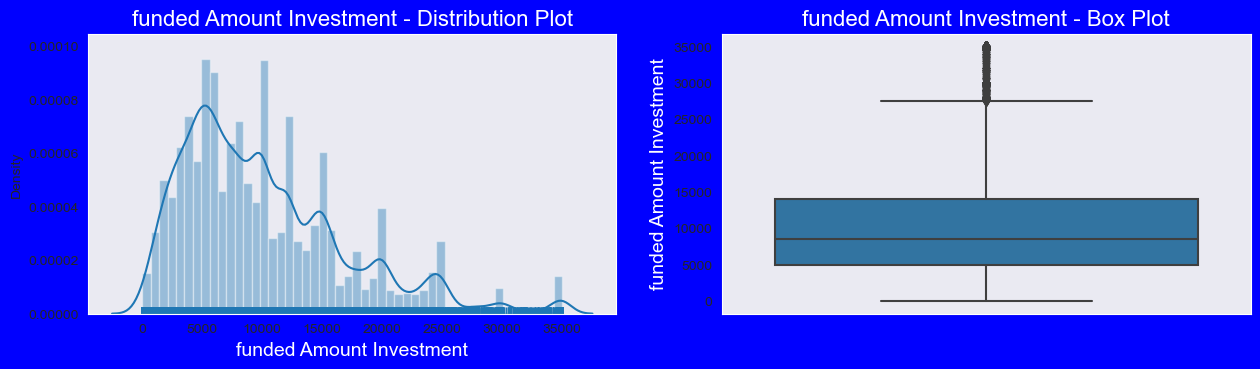

In [36]:
# Univariate Analysis on Funded amount investment-Quantitative Variables

plt.figure(figsize=(15,8),facecolor='b')
sns.set_style("dark")
# subplot 1
plt.subplot(2, 2, 1)
ax = sns.distplot(loan['funded_amnt_inv'],rug = True)
ax.set_title('funded Amount Investment - Distribution Plot',fontsize=16,color='w')
ax.set_xlabel('funded Amount Investment',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 2, 2)
ax = sns.boxplot(y=loan['funded_amnt_inv'])
ax.set_title('funded Amount Investment - Box Plot',fontsize=16,color='w')
ax.set_ylabel('funded Amount Investment',fontsize=14,color='w')
plt.show()

# Observations :
# Below plots show that most of the Loan amounts are in range of 5000 - 15000

Univariate Categorical orderd feature analysis

In [39]:
# lets analysis loan_status variable
loan["loan_status"].value_counts(normalize=True)


# observation:85% of loans also full paid

#14% loans are not paid or charged off

Fully Paid     0.853788
Charged Off    0.146212
Name: loan_status, dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


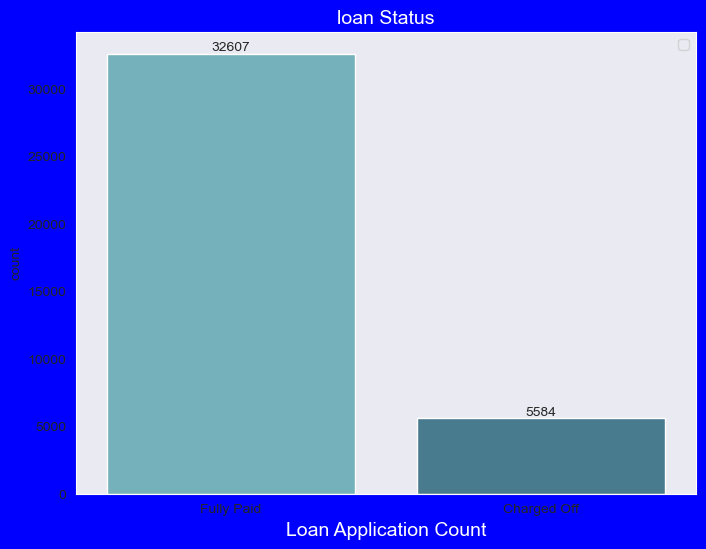

In [40]:
plt.figure(figsize=(8,6),facecolor='b')
ax = sns.countplot(x="loan_status",data=loan,palette='GnBu_d')
ax.set_title('loan Status',fontsize=14,color='w')
ax.set_xlabel('Loan Application Count',fontsize=14,color = 'w')
# ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')      
ax.legend(bbox_to_anchor=(1, 1))
for container in ax.containers:
    ax.bar_label(container)
plt.show()

# observation::85% of loans also full paid

#14% loans are not paid or charged off

In [41]:
# lets analysis emp_length variable
loan["emp_length"].value_counts(normalize=True)


# observation:22% of people of 10+ experience have taken loan 
# 19% loans taken by 1 year experienced people
# 2%  loans taken by freshers or no experienced people

10    0.218743
1     0.199576
2     0.111152
3     0.104134
4     0.086801
5     0.082951
6     0.056322
7     0.044435
8     0.037155
9     0.031814
0     0.026917
Name: emp_length, dtype: float64

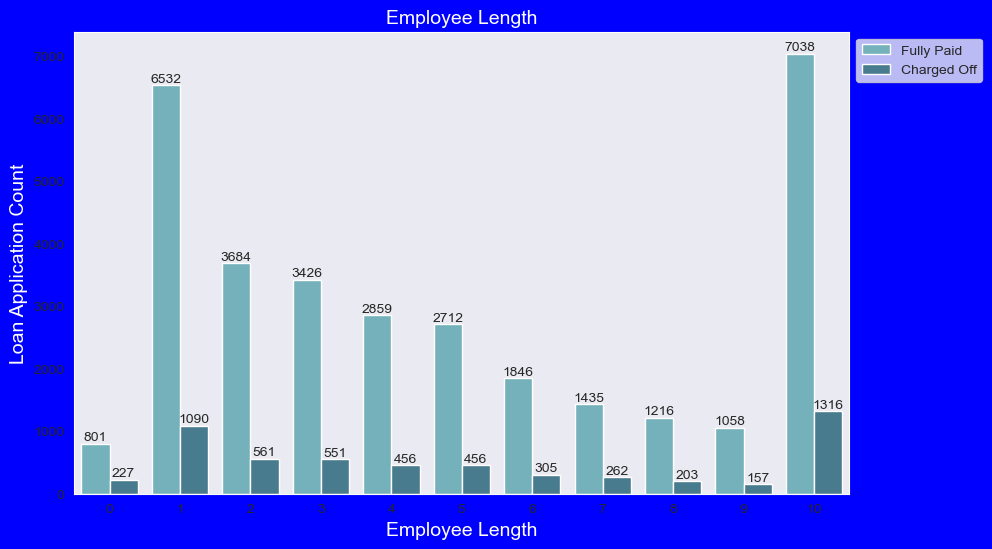

In [42]:
plt.figure(figsize=(10,6),facecolor='b')
ax = sns.countplot(x="emp_length",data=loan,hue='loan_status',palette='GnBu_d')
ax.set_title('Employee Length',fontsize=14,color='w')
ax.set_xlabel('Employee Length',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')      
ax.legend(bbox_to_anchor=(1, 1))
for container in ax.containers:
    ax.bar_label(container)
plt.show()

# observation:10+ year and 1 experienced applicant have most  full paid the loan amount 

In [43]:
loan["term"].value_counts(normalize=True)
# observation:75% loans taken fro 36 months tenure
#  25% loans taken for 60 months


 36 months    0.754602
 60 months    0.245398
Name: term, dtype: float64

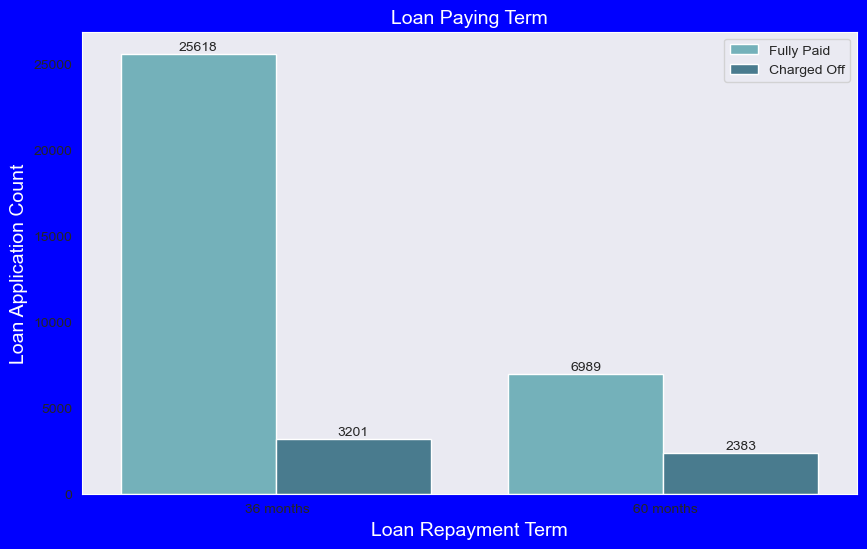

In [44]:

plt.figure(figsize=(10,6),facecolor='b')
ax = sns.countplot(x="term",data=loan,hue='loan_status',palette='GnBu_d')
ax.set_title('Loan Paying Term',fontsize=14,color='w')
ax.set_xlabel('Loan Repayment Term',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')      
ax.legend(bbox_to_anchor=(1, 1))
for container in ax.containers:
    ax.bar_label(container)
plt.show()

# Observations :
# Below plot shows that those who had taken loan to repay in 60 months had more % of number of applicants getting 
# charged off as compared to applicants who had taken loan for 36 months.

Univariate Categorical unorderd feature analysis

In [45]:
# lets analysis purpose variable
loan["purpose"].value_counts(normalize=True)


# observation:46% of loans purpose is debt_consolidation
# 12% loans purpose is credit_card
#10% loans taken for other purpose

debt_consolidation    0.469142
credit_card           0.130581
other                 0.100312
home_improvement      0.073237
major_purchase        0.055746
small_business        0.045115
car                   0.039041
wedding               0.024011
medical               0.017648
moving                0.014925
vacation              0.009819
house                 0.009348
educational           0.008457
renewable_energy      0.002618
Name: purpose, dtype: float64

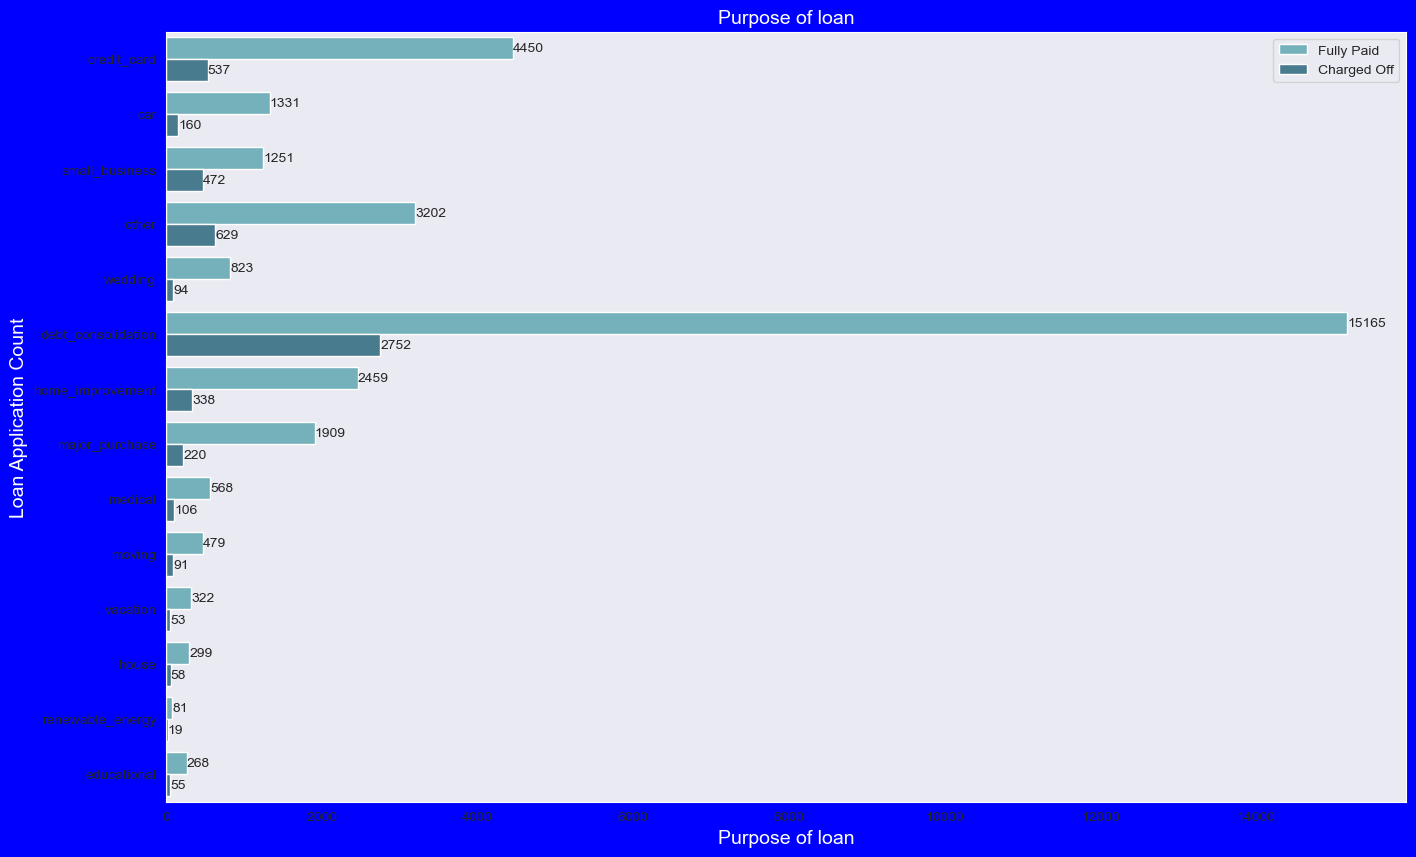

In [46]:
plt.figure(figsize=(16,10),facecolor='b')
ax = sns.countplot(y="purpose",data=loan,hue='loan_status',palette='GnBu_d')
ax.set_title('Purpose of loan',fontsize=14,color='w')
ax.set_xlabel('Purpose of loan',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')      
ax.legend(bbox_to_anchor=(1, 1))
for container in ax.containers:
    ax.bar_label(container)
plt.show()

# Observations :
# Below plot shows that most of the loans were taken for the purpose of debt consolidation & paying credit card bill.


In [47]:
# lets analysis home_ownership variable
loan["home_ownership"].value_counts(normalize=True)

# observation:48% of peples who are in rent have taken loan
# 44% of peples have taken loan by mortage
#only 7% of peples who are in own home have taken loan

RENT        0.481710
MORTGAGE    0.438533
OWN         0.077165
OTHER       0.002514
NONE        0.000079
Name: home_ownership, dtype: float64

In [ ]:
loan.groupby(["home_ownership"])."loan_status"

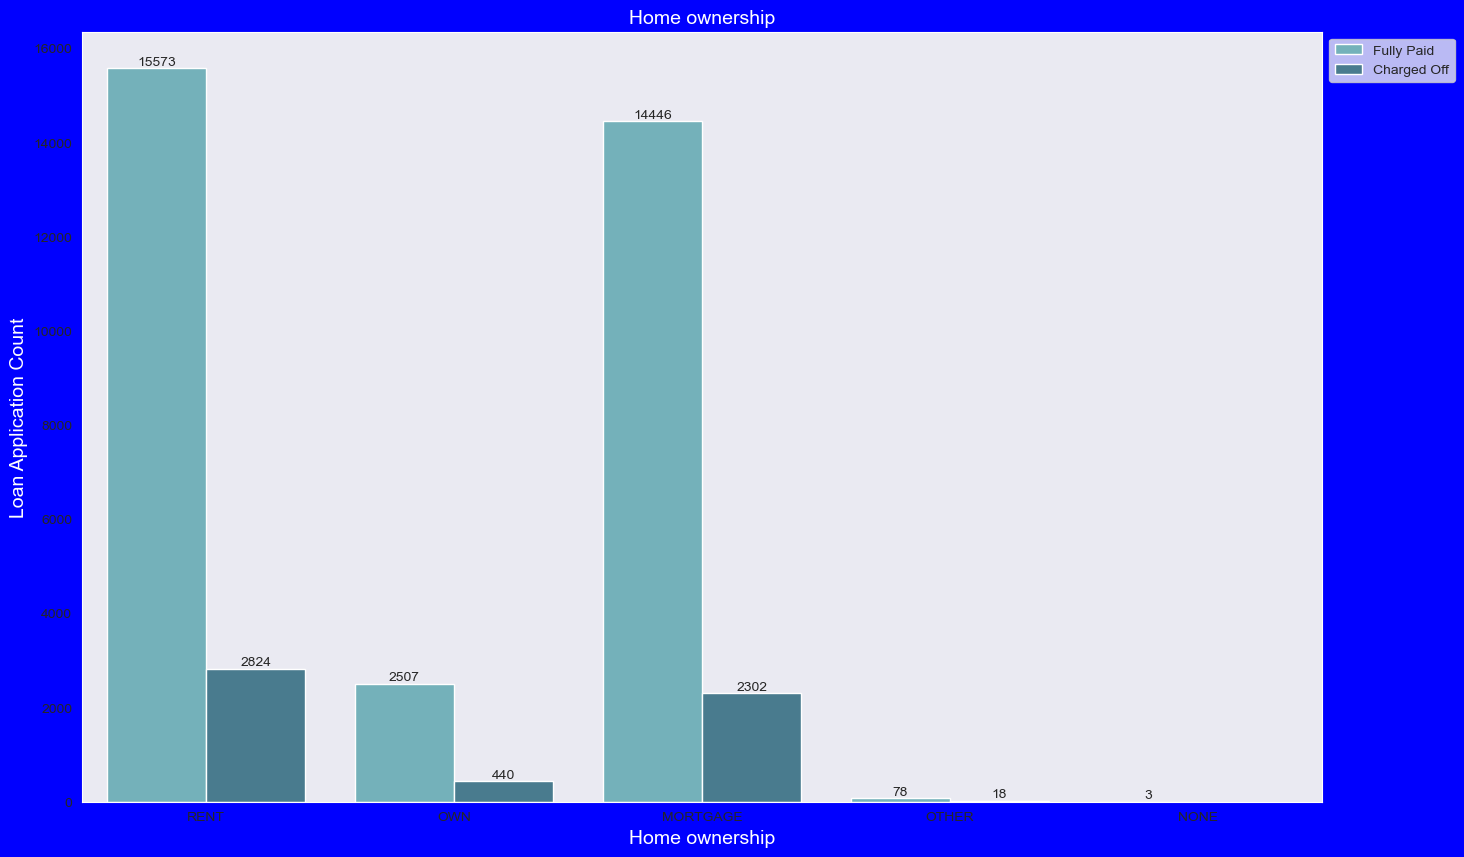

In [48]:
plt.figure(figsize=(16,10),facecolor='b')
ax = sns.countplot(x="home_ownership",data=loan,hue='loan_status',palette='GnBu_d')
ax.set_title('Home ownership',fontsize=14,color='w')
ax.set_xlabel('Home ownership',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')      
ax.legend(bbox_to_anchor=(1, 1))
for container in ax.containers:
    ax.bar_label(container)
plt.show()

# observation:48% of peples who are in rent have taken loan
# 44% of peples have taken loan by mortage
#only 7% of peples who are in own home have taken loan

Derived Metrices

In [49]:
loan.issue_d = pd.to_datetime(loan.issue_d, format='%b-%y')
loan['year']=loan['issue_d'].dt.year
loan['month']=loan['issue_d'].dt.month
loan.shape
# year and month od issued loan is added


(38191, 50)

In [50]:
# categorise loan amounts into buckets which will help in analysis further in bivariate analysis.
loan['loan_amnt_cats'] = pd.cut(loan['loan_amnt'], [0, 7000, 14000, 21000, 28000, 35000], labels=['0-7000', '7000-14000', '14000-21000', '21000-28000', '28000 +'])

# categorise annual incomes into buckets which will help in analysis further in bivariate analysis.
loan['annual_inc_cats'] = pd.cut(loan['annual_inc'], [0, 20000, 40000, 60000, 80000,1000000], labels=['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000 +'])

# categorise intrest rates into buckets which will help in analysis further in bivariate analysis.
loan['int_rate_cats'] = pd.cut(loan['int_rate'], [0, 10, 12.5, 16, 20], labels=['0-10', '10-13', '12.5-16', '16 +'])

# categorise dti into buckets for bivariate analysis.
loan['dti_cats'] = pd.cut(loan['dti'], [0, 5, 10, 15, 20, 25], labels=['0-5', '05-10', '10-15', '15-20', '25+'])

loan.shape
# loan_amnt_cats ,annual_inc_cats,int_rate_cats and dti_cats  feature is added


(38191, 54)

In [51]:

# categorise funded_amnt_inv into buckets which will help in analysis further in bivariate analysis.
loan['funded_amnt_inv_cat'] = pd.cut(loan['funded_amnt_inv'], [0, 7000, 14000, 21000, 28000, 35000], labels=['0-7000', '7000-14000', '14000-21000', '21000-28000', '28000 +'])



In [52]:
# categorise funded_amntinto buckets which will help in analysis further in bivariate analysis.
loan['funded_amnt_cat'] = pd.cut(loan['funded_amnt'], [0, 7000, 14000, 21000, 28000, 35000], labels=['0-7000', '7000-14000', '14000-21000', '21000-28000', '28000 +'])

In [53]:
loan['loan_amnt_cats'].value_counts(normalize=True)

# observation:37%  of loan amount in the range of 0-7000 
# 34%  of loan amount in the range of 7000-14000
# only 2% loan amount in the range of 280000+

0-7000         0.373229
7000-14000     0.345998
14000-21000    0.182242
21000-28000    0.070750
28000 +        0.027781
Name: loan_amnt_cats, dtype: float64

In [54]:
loan['annual_inc_cats'].value_counts(normalize=True)

# observation:29% applicant whose annual income is 40000-60000 has taken loan
# 25% applicant whose annual income is 80000+ has taken loan
# only 3% applicant whose annual income is 0-20000 has taken loan

40000-60000    0.294912
80000 +        0.251604
20000-40000    0.223037
60000-80000    0.199550
0-20000        0.030897
Name: annual_inc_cats, dtype: float64

In [55]:
loan['int_rate_cats'].value_counts(normalize=True)

# observation: 32% of loan amount taken by applicant are in interest rate 0f 0-10
# 30% of loan amount taken by applicant are in interest rate 0f 12.5-16.
# 24% of loan amount taken by applicant are in interest rate 0f 10-13.
# 12% of loan amount taken by applicant are in interest rate 0f 16+

0-10       0.326497
12.5-16    0.303025
10-13      0.248525
16 +       0.121953
Name: int_rate_cats, dtype: float64

In [56]:
loan['dti_cats'].value_counts(normalize=True)

# observation:25% of dti of  applicant is 10-15
# 23% of dti of  applicant is 15-20
# 20% of dti of  applicant  is 5-10
# 17% of dti of  applicant  is 25+

10-15    0.255556
15-20    0.234910
05-10    0.207124
25+      0.175728
0-5      0.126681
Name: dti_cats, dtype: float64

In [57]:
loan['funded_amnt_cat'].value_counts(normalize=True)

# observation:37%  of funded amount in the range of 0-7000 
# 34%  of funded amount in the range of 7000-14000
# only 2% funded amount in the range of 280000+


0-7000         0.378911
7000-14000     0.353539
14000-21000    0.180828
21000-28000    0.062790
28000 +        0.023932
Name: funded_amnt_cat, dtype: float64

In [58]:
loan['funded_amnt_inv_cat'].value_counts(normalize=True)

# observation:37%  of funded amount investment in the range of 0-7000 
# 34%  of funded amount investment in the range of 7000-14000
# only 2% funded amount investment in the range of 280000+

0-7000         0.408139
7000-14000     0.345795
14000-21000    0.166146
21000-28000    0.057641
28000 +        0.022279
Name: funded_amnt_inv_cat, dtype: float64

Correlation Matrix - Quantitative Variables :

In [59]:
loan_corr = loan[["total_pymnt","funded_amnt","funded_amnt_inv","annual_inc","year","month","dti","loan_amnt","int_rate","installment","emp_length"]].corr()

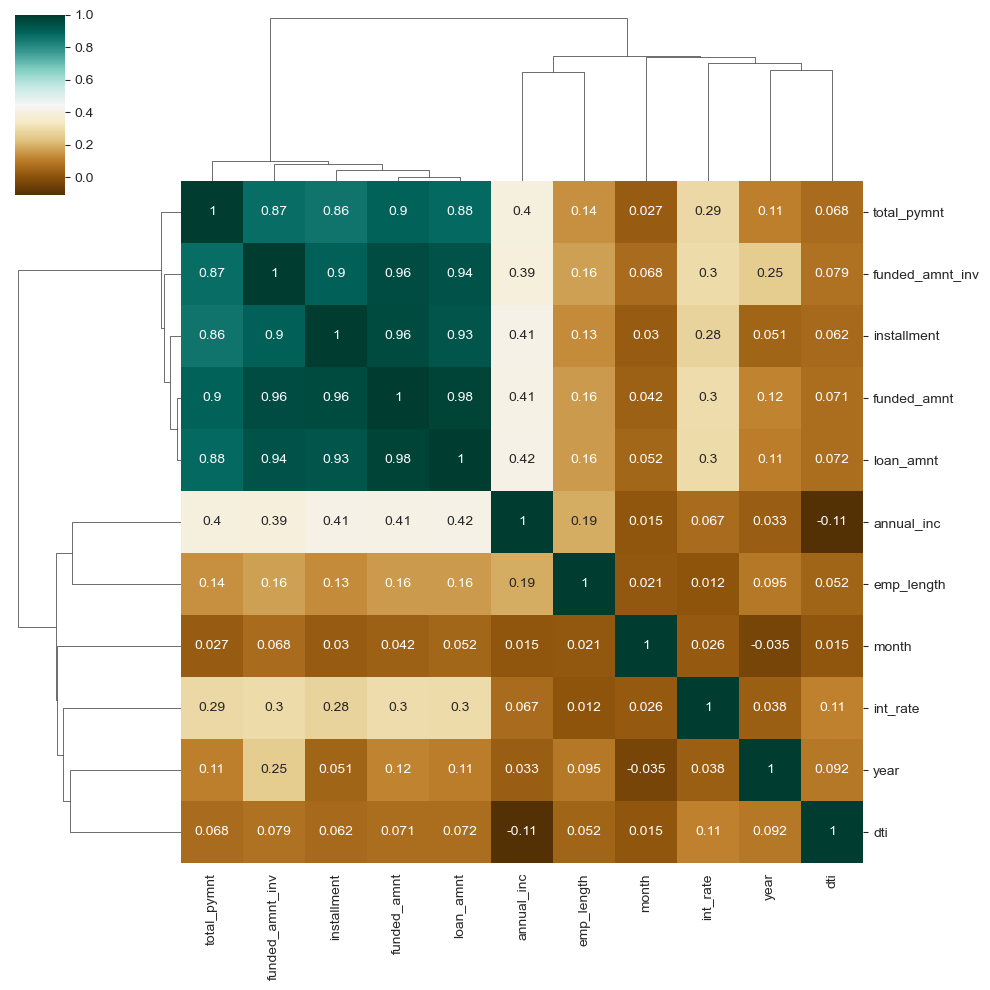

In [60]:
sns.clustermap(loan_corr,annot=True,cmap="BrBG")

# observation:total_pymnt,loan_amnt,funded_amnt,funded_amnt_inv,installment are highly correlate
#              anuul_income and dti are negatively correlated.as annual_income increases dti decreases


In [61]:
# Data cleaning
# Drop additional columns which are not needed further in analysis.

columns_drop2 = ["application_type","policy_code","initial_list_status","installment","pymnt_plan"]
loan.drop(labels = columns_drop2, axis =1, inplace=True)
print(loan.shape)

(38191, 51)


Bivariate Analysis

In [62]:
loan_annual_income = loan.groupby(['annual_inc_cats','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
loan_annual_income

loan_status annual_inc_cats  Charged Off  Fully Paid
0                   0-20000          237         943
1               20000-40000         1514        7004
2               40000-60000         1729        9534
3               60000-80000         1024        6597
4                   80000 +         1080        8529

In [63]:
# Bivariate Analysis on annual income against Chargedoff_percentage -
loan_annual_income['Total'] = loan_annual_income['Charged Off'] + loan_annual_income['Fully Paid'] 
loan_annual_income['Chargedoff_percentage'] = loan_annual_income['Charged Off'] / loan_annual_income['Total']


In [64]:
loan_annual_income.sort_values('Chargedoff_percentage', ascending=False)

# observation:
# Income range 80000+  has less chances of charged off.
# Income range 0-20000 has high chances of charged off.
# Notice that with increase in annual income charged off proportion got decreased. 

loan_status annual_inc_cats  Charged Off  Fully Paid  Total  \
0                   0-20000          237         943   1180   
1               20000-40000         1514        7004   8518   
2               40000-60000         1729        9534  11263   
3               60000-80000         1024        6597   7621   
4                   80000 +         1080        8529   9609   

loan_status  Chargedoff_percentage  
0                         0.200847  
1                         0.177741  
2                         0.153511  
3                         0.134366  
4                         0.112395

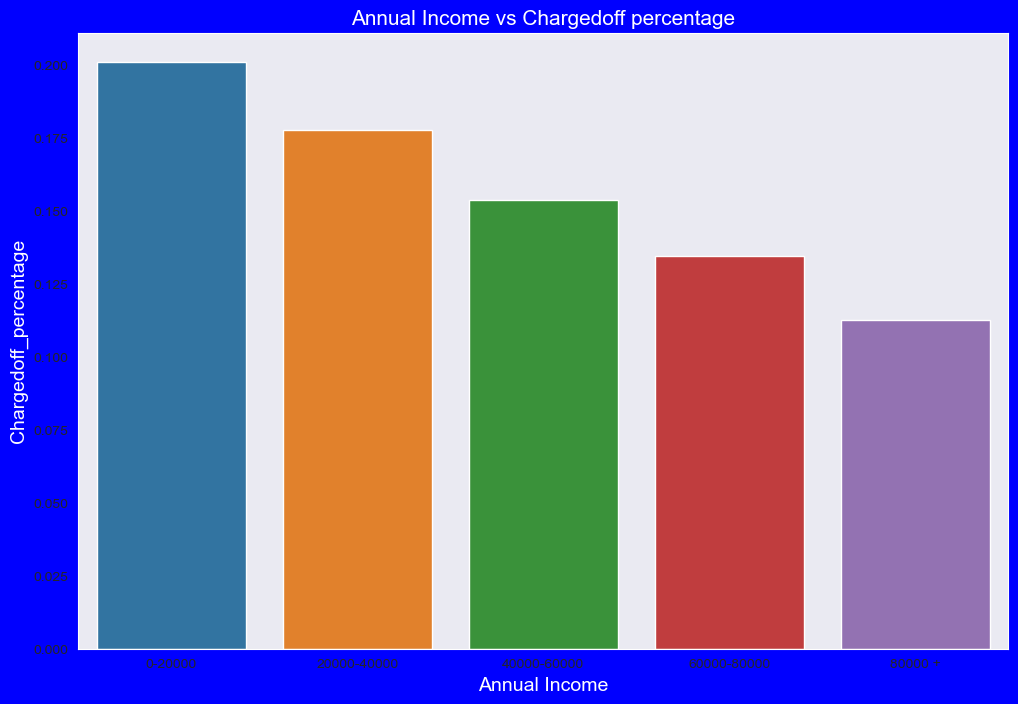

In [65]:
#  Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Annual Income vs Chargedoff percentage',fontsize=15,color = 'w')
ax1=sns.barplot(x='annual_inc_cats', y='Chargedoff_percentage', data=loan_annual_income)
ax1.set_ylabel('Chargedoff_percentage',fontsize=14,color = 'w')
ax1.set_xlabel('Annual Income',fontsize=14,color='w')

plt.show()

# Observations:
# Income range 80000+  has less chances of charged off.
# Income range 0-20000 has high chances of charged off.
# Notice that with increase in annual income charged off proportion got decreased

In [66]:
# Bivariate Analysis on loan amount against Chargedoff_percentage -
loan_loan_amount = loan.groupby(['loan_amnt_cats','loan_status']).loan_status.count().unstack().fillna(0).reset_index()

loan_loan_amount['Total'] = loan_loan_amount['Charged Off'] + loan_loan_amount['Fully Paid'] 
loan_loan_amount['Chargedoff_percentage'] = loan_loan_amount['Charged Off'] / loan_loan_amount['Total']
loan_loan_amount.sort_values('Chargedoff_percentage', ascending=False)

loan_status loan_amnt_cats  Charged Off  Fully Paid  Total  \
4                  28000 +          253         808   1061   
3              21000-28000          526        2176   2702   
2              14000-21000         1144        5816   6960   
1               7000-14000         1780       11434  13214   
0                   0-7000         1881       12373  14254   

loan_status  Chargedoff_percentage  
4                         0.238454  
3                         0.194671  
2                         0.164368  
1                         0.134706  
0                         0.131963

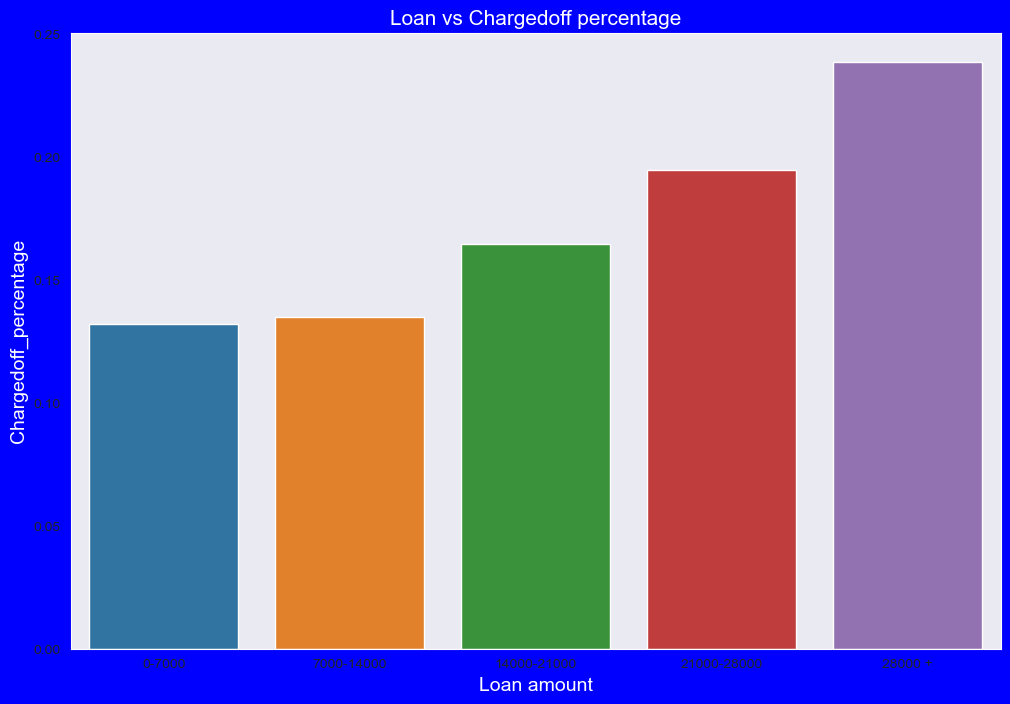

In [67]:
#  Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Loan vs Chargedoff percentage',fontsize=15,color = 'w')
ax1=sns.barplot(x='loan_amnt_cats', y='Chargedoff_percentage', data=loan_loan_amount)
ax1.set_ylabel('Chargedoff_percentage',fontsize=14,color = 'w')
ax1.set_xlabel('Loan amount',fontsize=14,color='w')

plt.show()

# Observations:
# loan amount 0-7000  has less chances of charged off.
# loan amount 280000+ has high chances of charged off.
# Notice that with increase in loan amount charged off proportion got increaed

In [68]:
# Bivariate Analysis on interest rate against Chargedoff_percentage -
loan_loan_amount = loan.groupby(['int_rate_cats','loan_status']).loan_status.count().unstack().fillna(0).reset_index()

loan_loan_amount['Total'] = loan_loan_amount['Charged Off'] + loan_loan_amount['Fully Paid'] 
loan_loan_amount['Chargedoff_percentage'] = loan_loan_amount['Charged Off'] / loan_loan_amount['Total']
loan_loan_amount.sort_values('Chargedoff_percentage', ascending=False)

# Observations:
# Interest Rate 16+% has more chances of charged off.
# Interest Rate 0 -10% has less chances of charged off.
# Notice that with increase inInterest Rate charged off proportion got increase

loan_status int_rate_cats  Charged Off  Fully Paid  Total  \
3                    16 +         1250        3317   4567   
2                 12.5-16         1995        9353  11348   
1                   10-13         1224        8083   9307   
0                    0-10          825       11402  12227   

loan_status  Chargedoff_percentage  
3                         0.273703  
2                         0.175802  
1                         0.131514  
0                         0.067474

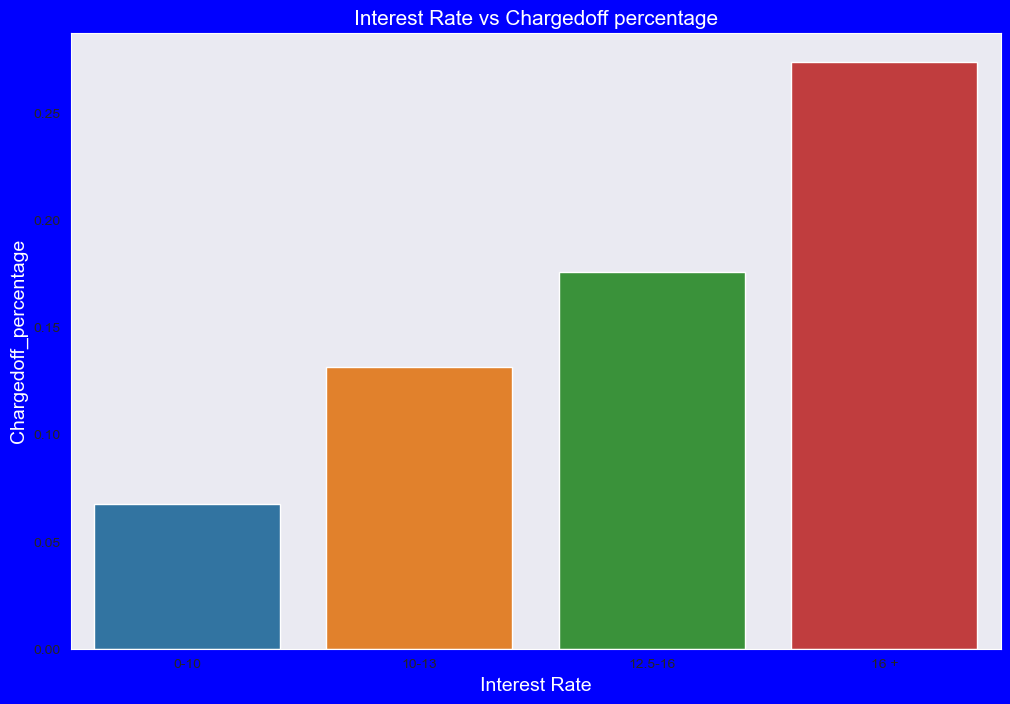

In [69]:
#  Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Interest Rate vs Chargedoff percentage',fontsize=15,color = 'w')
ax1=sns.barplot(x='int_rate_cats', y='Chargedoff_percentage', data=loan_loan_amount)
ax1.set_ylabel('Chargedoff_percentage',fontsize=14,color = 'w')
ax1.set_xlabel('Interest Rate',fontsize=14,color='w')

plt.show()

# Observations:
# Interest Rate 16+% has more chances of charged off.
# Interest Rate 0 -10% has less chances of charged off.
# Notice that with increase inInterest Rate charged off proportion got increase

In [70]:
# Bivariate Analysis on dti against Chargedoff_percentage -
loan_loan_amount = loan.groupby(['dti_cats','loan_status']).loan_status.count().unstack().fillna(0).reset_index()

loan_loan_amount['Total'] = loan_loan_amount['Charged Off'] + loan_loan_amount['Fully Paid'] 
loan_loan_amount['Chargedoff_percentage'] = loan_loan_amount['Charged Off'] / loan_loan_amount['Total']
loan_loan_amount.sort_values('Chargedoff_percentage', ascending=False)

# Observations:
# Interest Rate 25+has more chances of charged off.
# Interest Rate 0-5 has less chances of charged off.
# Notice that with increase in Dti charged off proportion got increase

loan_status dti_cats  Charged Off  Fully Paid  Total  Chargedoff_percentage
4                25+         1116        5455   6571               0.169837
3              15-20         1385        7399   8784               0.157673
2              10-15         1392        8164   9556               0.145668
1              05-10          996        6749   7745               0.128599
0                0-5          580        4157   4737               0.122440

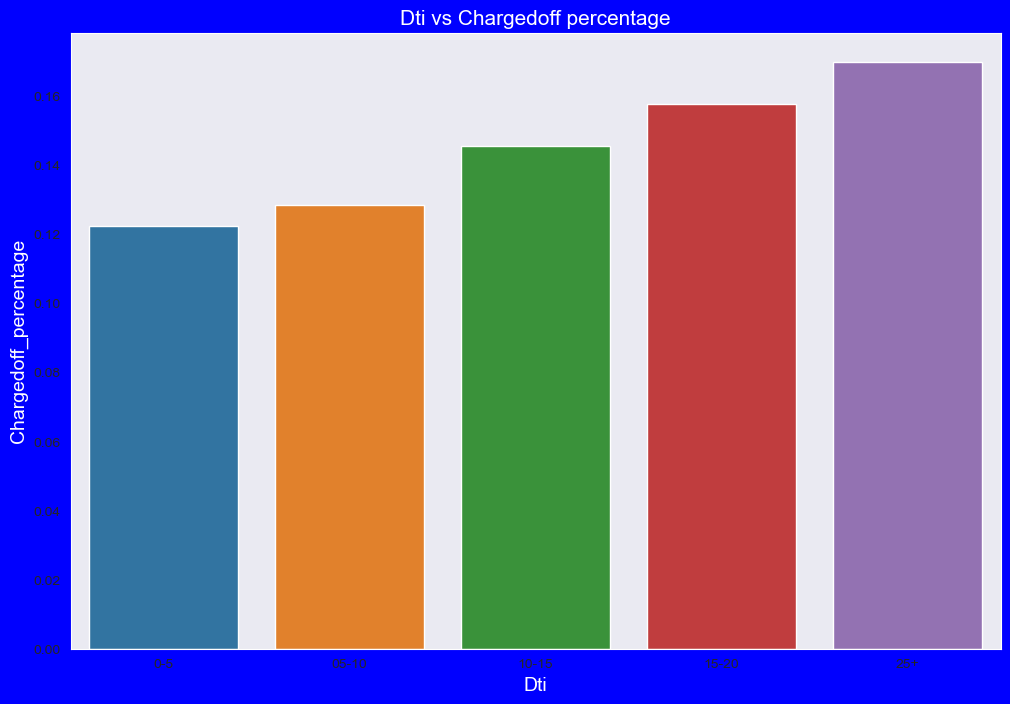

In [71]:
#  Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Dti vs Chargedoff percentage',fontsize=15,color = 'w')
ax1=sns.barplot(x='dti_cats', y='Chargedoff_percentage', data=loan_loan_amount)
ax1.set_ylabel('Chargedoff_percentage',fontsize=14,color = 'w')
ax1.set_xlabel('Dti',fontsize=14,color='w')

plt.show()

# Observations:
# Interest Rate 25+has more chances of charged off.
# Interest Rate 0-5 has less chances of charged off.
# Notice that with increase in Dti charged off proportion got increase

In [72]:
# Bivariate Analysis on grade against Chargedoff_percentage -
loan_loan_amount = loan.groupby(['grade','loan_status']).loan_status.count().unstack().fillna(0).reset_index()

loan_loan_amount['Total'] = loan_loan_amount['Charged Off'] + loan_loan_amount['Fully Paid'] 
loan_loan_amount['Chargedoff_percentage'] = loan_loan_amount['Charged Off'] / loan_loan_amount['Total']
loan_loan_amount.sort_values('Chargedoff_percentage', ascending=False)

# Observations:
# grade G  has more chances of charged off.
# grade A has less chances of charged off.
# charged off inceases as grade moves from A to G

loan_status grade  Charged Off  Fully Paid  Total  Chargedoff_percentage
6               G           99         190    289               0.342561
5               F          312         642    954               0.327044
4               E          704        1906   2610               0.269732
3               D         1112        3915   5027               0.221205
2               C         1342        6411   7753               0.173094
1               B         1414       10167  11581               0.122097
0               A          601        9376   9977               0.060239

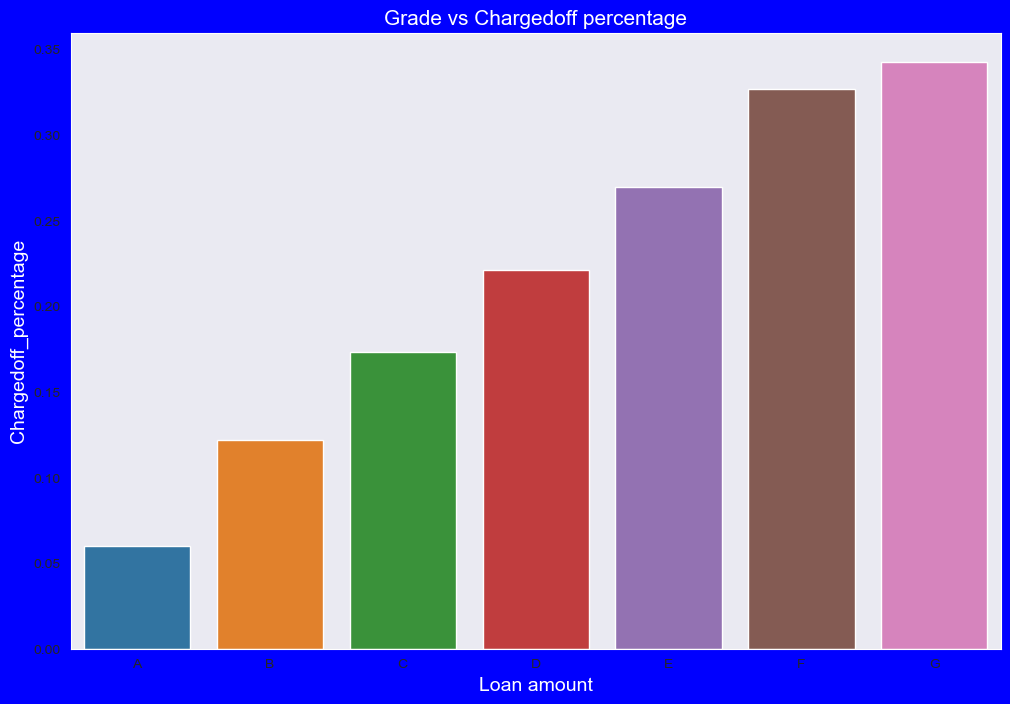

In [73]:
#  Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Grade vs Chargedoff percentage',fontsize=15,color = 'w')
ax1=sns.barplot(x='grade', y='Chargedoff_percentage', data=loan_loan_amount)
ax1.set_ylabel('Chargedoff_percentage',fontsize=14,color = 'w')
ax1.set_xlabel('Loan amount',fontsize=14,color='w')

plt.show()

# Observations:
# grade G  has more chances of charged off.
# grade A has less chances of charged off.
# charged off inceases as grade moves from A to G

In [74]:
# Bivariate Analysis on subgrade against Chargedoff_percentage -
loan_loan_amount = loan.groupby(['sub_grade','loan_status']).loan_status.count().unstack().fillna(0).reset_index()

loan_loan_amount['Total'] = loan_loan_amount['Charged Off'] + loan_loan_amount['Fully Paid'] 
loan_loan_amount['Chargedoff_percentage'] = loan_loan_amount['Charged Off'] / loan_loan_amount['Total']
loan_loan_amount.sort_values('Chargedoff_percentage', ascending=False)

# Observations:
# grade F5 has more chances of charged off.
# grade A1 has less chances of charged off.


loan_status sub_grade  Charged Off  Fully Paid  Total  Chargedoff_percentage
29                 F5           53          55    108               0.490741
32                 G3           19          25     44               0.431818
31                 G2           27          47     74               0.364865
34                 G5           10          18     28               0.357143
28                 F4           52          96    148               0.351351
30                 G1           31          61     92               0.336957
23                 E4          126         293    419               0.300716
26                 F2           69         162    231               0.298701
27                 F3           50         118    168               0.297619
25                 F1           88         211    299               0.294314
24                 E5          106         264    370               0.286486
20                 E1          195         517    712               0.273876
21                 E2          160         444    604               0.264901
19                 D5          209         617    826               0.253027
18                 D4          214         692    906               0.236203
33                 G4           12          39     51               0.235294
22                 E3          117         388    505               0.231683
17                 D3          253         850   1103               0.229374
16                 D2          269        1000   1269               0.211978
12                 C3          269        1200   1469               0.183118
14                 C5          208         931   1139               0.182616
15                 D1          167         756    923               0.180932
13                 C4          211         988   1199               0.175980
11                 C2          321        1593   1914               0.167712
10                 C1          333        1699   2032               0.163878
9                  B5          356        2244   2600               0.136923
8                  B4          328        2097   2425               0.135258
7                  B3          335        2457   2792               0.119986
6                  B2          225        1753   1978               0.113751
5                  B1          170        1616   1786               0.095185
4                  A5          216        2477   2693               0.080208
3                  A4          178        2676   2854               0.062369
2                  A3          103        1696   1799               0.057254
1                  A2           74        1425   1499               0.049366
0                  A1           30        1102   1132               0.026502

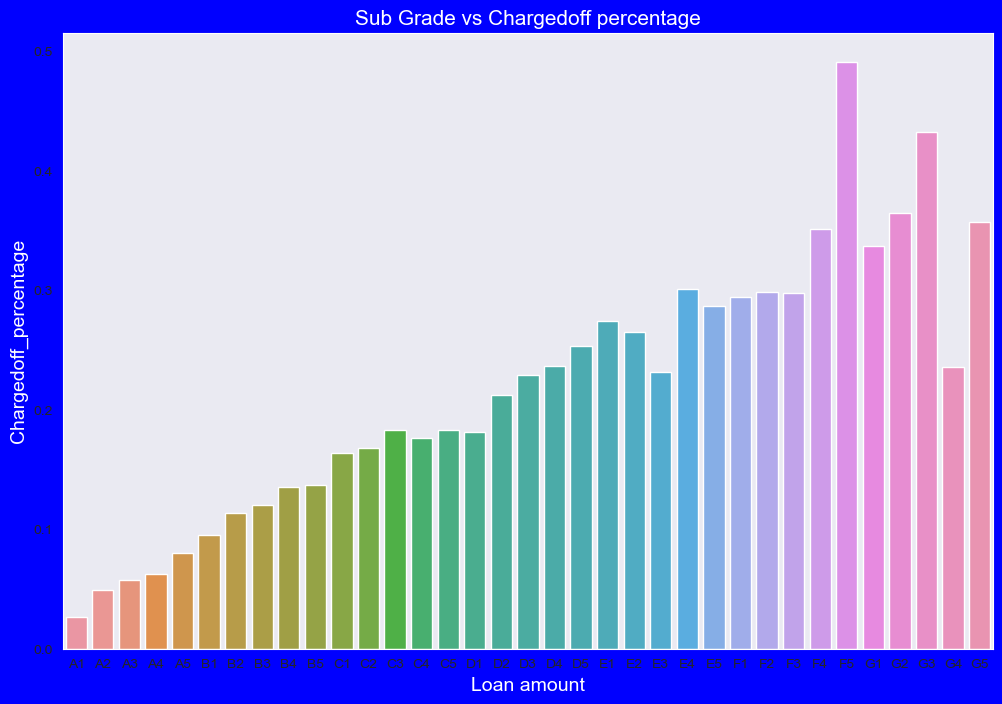

In [75]:
#  Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Sub Grade vs Chargedoff percentage',fontsize=15,color = 'w')
ax1=sns.barplot(x='sub_grade', y='Chargedoff_percentage', data=loan_loan_amount)
ax1.set_ylabel('Chargedoff_percentage',fontsize=14,color = 'w')
ax1.set_xlabel('Loan amount',fontsize=14,color='w')

plt.show()

# Observations:
# grade F5 has more chances of charged off.
# grade A1 has less chances of charged off.


In [76]:
# Bivariate Analysis on purpose of loan against Chargedoff_percentage -
loan_loan_amount = loan.groupby(['purpose','loan_status']).loan_status.count().unstack().fillna(0).reset_index()

loan_loan_amount['Total'] = loan_loan_amount['Charged Off'] + loan_loan_amount['Fully Paid'] 
loan_loan_amount['Chargedoff_percentage'] = loan_loan_amount['Charged Off'] / loan_loan_amount['Total']
loan_loan_amount.sort_values('Chargedoff_percentage', ascending=False)

# Observations:
# Loan which is taken for small business  has more chances of charged off.
# Loan which is taken for wedding,credit_card and car  has less chances of charged off.


loan_status             purpose  Charged Off  Fully Paid  Total  \
11               small_business          472        1251   1723   
10             renewable_energy           19          81    100   
3                   educational           55         268    323   
9                         other          629        3202   3831   
5                         house           58         299    357   
8                        moving           91         479    570   
7                       medical          106         568    674   
2            debt_consolidation         2752       15165  17917   
12                     vacation           53         322    375   
4              home_improvement          338        2459   2797   
1                   credit_card          537        4450   4987   
0                           car          160        1331   1491   
6                major_purchase          220        1909   2129   
13                      wedding           94         823    917   

loan_status  Chargedoff_percentage  
11                        0.273941  
10                        0.190000  
3                         0.170279  
9                         0.164187  
5                         0.162465  
8                         0.159649  
7                         0.157270  
2                         0.153597  
12                        0.141333  
4                         0.120844  
1                         0.107680  
0                         0.107311  
6                         0.103335  
13                        0.102508

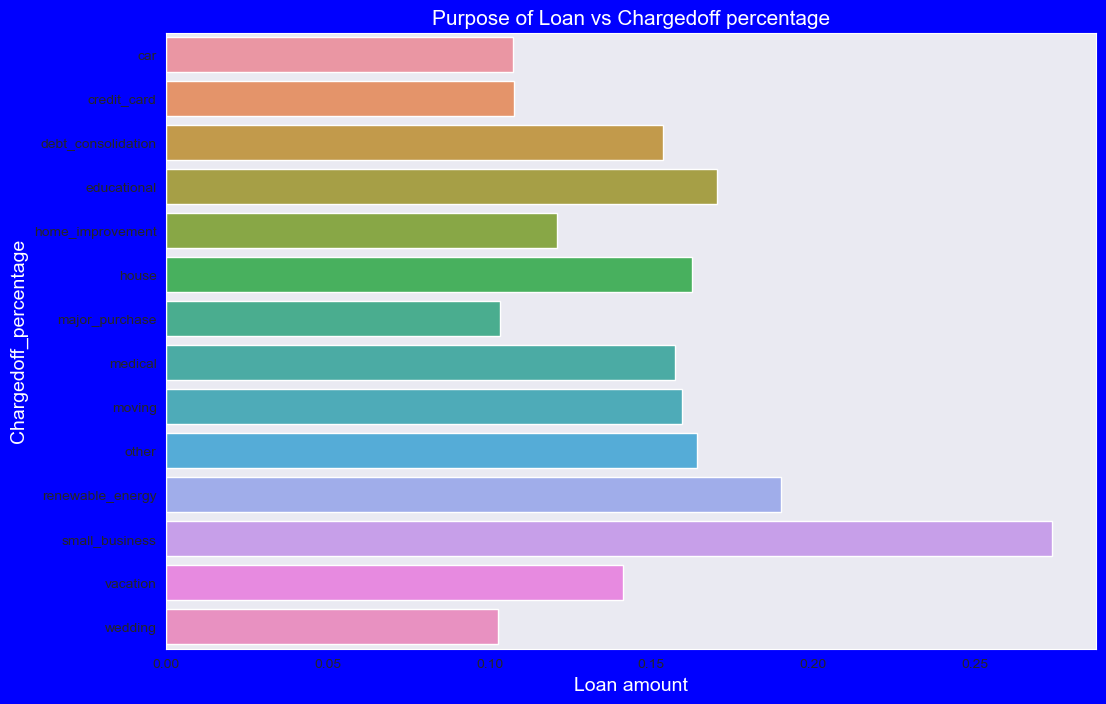

In [77]:
#  Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Purpose of Loan vs Chargedoff percentage',fontsize=15,color = 'w')
ax1=sns.barplot(y='purpose', x='Chargedoff_percentage', data=loan_loan_amount)
ax1.set_ylabel('Chargedoff_percentage',fontsize=14,color = 'w')
ax1.set_xlabel('Loan amount',fontsize=14,color='w')

plt.show()

# Observations:
# Loan which is taken for small business  has more chances of charged off.
# Loan which is taken for wedding,credit_card and car  has less chances of charged off.


In [78]:
# Bivariate Analysis on verification_status against Chargedoff_percentage -
loan_loan_amount = loan.groupby(['verification_status','loan_status']).loan_status.count().unstack().fillna(0).reset_index()

loan_loan_amount['Total'] = loan_loan_amount['Charged Off'] + loan_loan_amount['Fully Paid'] 
loan_loan_amount['Chargedoff_percentage'] = loan_loan_amount['Charged Off'] / loan_loan_amount['Total']
loan_loan_amount.sort_values('Chargedoff_percentage', ascending=False)

# Observations:
# There is not much difference in charged off proportion.
# This variable doesn't provide any insights for charged off.

loan_status verification_status  Charged Off  Fully Paid  Total  \
2                      Verified         2032        9999  12031   
1               Source Verified         1422        8134   9556   
0                  Not Verified         2130       14474  16604   

loan_status  Chargedoff_percentage  
2                         0.168897  
1                         0.148807  
0                         0.128282

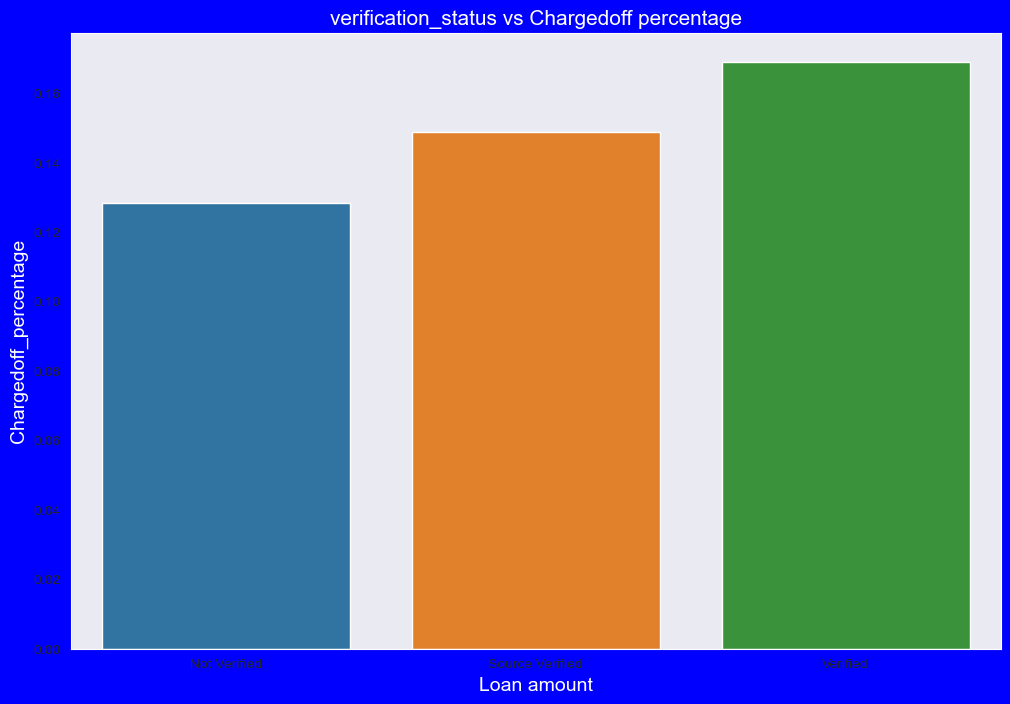

In [79]:
#  Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('verification_status vs Chargedoff percentage',fontsize=15,color = 'w')
ax1=sns.barplot(x='verification_status', y='Chargedoff_percentage', data=loan_loan_amount)
ax1.set_ylabel('Chargedoff_percentage',fontsize=14,color = 'w')
ax1.set_xlabel('Loan amount',fontsize=14,color='w')

plt.show()

# Observations:
# There is not much difference in charged off proportion.
# This variable doesn't provide any insights for charged off.

In [80]:
# Bivariate Analysis on employment length against Chargedoff_percentage -
loan_loan_amount = loan.groupby(['emp_length','loan_status']).loan_status.count().unstack().fillna(0).reset_index()

loan_loan_amount['Total'] = loan_loan_amount['Charged Off'] + loan_loan_amount['Fully Paid'] 
loan_loan_amount['Chargedoff_percentage'] = loan_loan_amount['Charged Off'] / loan_loan_amount['Total']
loan_loan_amount.sort_values('Chargedoff_percentage', ascending=False)


# Observations:
# Employee experience of 10 years  has less chances of charged off.
# No Employee experience has high chances of charged off.

loan_status  emp_length  Charged Off  Fully Paid  Total  Chargedoff_percentage
0                     0          227         801   1028               0.220817
10                   10         1316        7038   8354               0.157529
7                     7          262        1435   1697               0.154390
5                     5          456        2712   3168               0.143939
8                     8          203        1216   1419               0.143058
1                     1         1090        6532   7622               0.143007
6                     6          305        1846   2151               0.141795
3                     3          551        3426   3977               0.138547
4                     4          456        2859   3315               0.137557
2                     2          561        3684   4245               0.132155
9                     9          157        1058   1215               0.129218

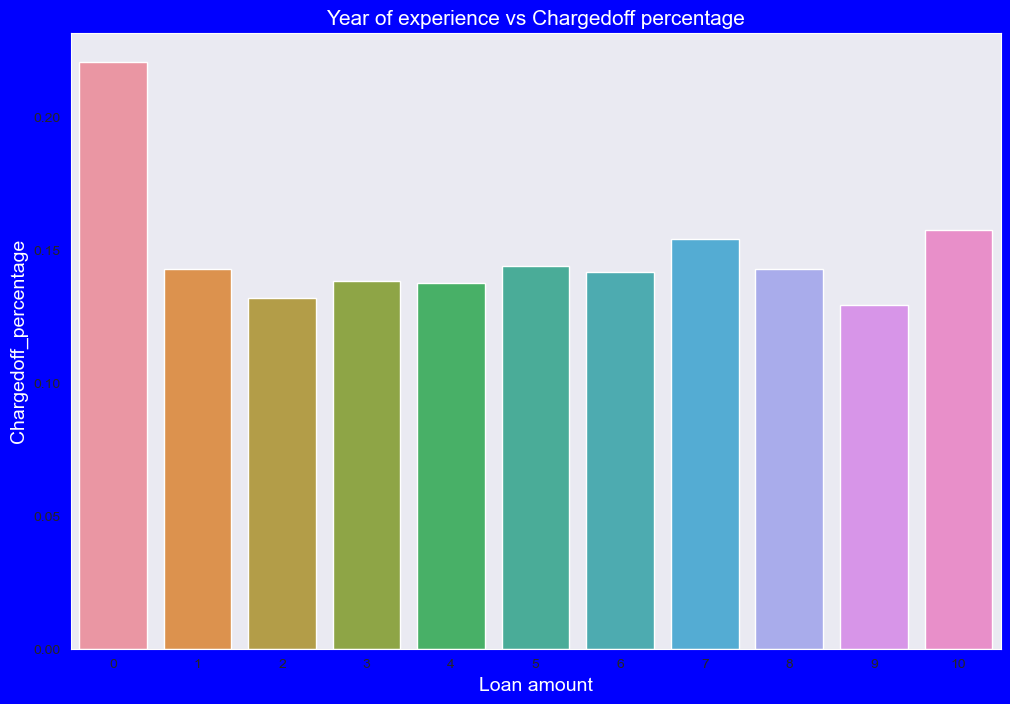

In [81]:
#  Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Year of experience vs Chargedoff percentage',fontsize=15,color = 'w')
ax1=sns.barplot(x='emp_length', y='Chargedoff_percentage', data=loan_loan_amount)
ax1.set_ylabel('Chargedoff_percentage',fontsize=14,color = 'w')
ax1.set_xlabel('Loan amount',fontsize=14,color='w')

plt.show()

# Observations:
# Employee experience of 10 years  has less chances of charged off.
# No Employee experience has high chances of charged off.


In [82]:
# Bivariate Analysis on Public Bankruptcy Records against Chargedoff_percentage -
loan_loan_amount = loan.groupby(['pub_rec_bankruptcies','loan_status']).loan_status.count().unstack().fillna(0).reset_index()

loan_loan_amount['Total'] = loan_loan_amount['Charged Off'] + loan_loan_amount['Fully Paid'] 
loan_loan_amount['Chargedoff_percentage'] = loan_loan_amount['Charged Off'] / loan_loan_amount['Total']
loan_loan_amount.sort_values('Chargedoff_percentage', ascending=False)

# Observations:
# Those who already have pub_rec_bankruptcies value 2, have charged off proportion higher than who have no pub_rec_bankruptcies.

# Not known is the column for which we don't have any information abount borrower.
# This also makes sense that who has defaulted before has more chances of dafaulting in future as well.

loan_status pub_rec_bankruptcies  Charged Off  Fully Paid  Total  \
2                            2.0            2           3      5   
1                            1.0          365        1268   1633   
3                      Not Known          116         572    688   
0                            0.0         5101       30764  35865   

loan_status  Chargedoff_percentage  
2                         0.400000  
1                         0.223515  
3                         0.168605  
0                         0.142228

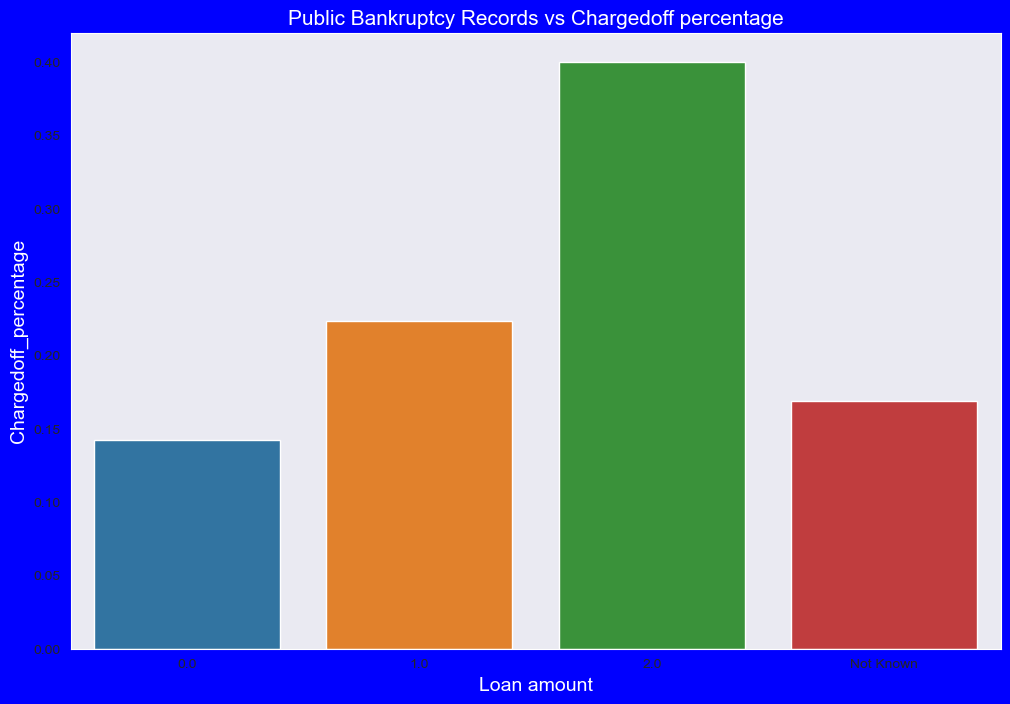

In [83]:
#  Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Public Bankruptcy Records vs Chargedoff percentage',fontsize=15,color = 'w')
ax1=sns.barplot(x='pub_rec_bankruptcies', y='Chargedoff_percentage', data=loan_loan_amount)
ax1.set_ylabel('Chargedoff_percentage',fontsize=14,color = 'w')
ax1.set_xlabel('Loan amount',fontsize=14,color='w')

plt.show()

# Observations:
# Those who already have pub_rec_bankruptcies value 2, have charged off proportion higher than who have no pub_rec_bankruptcies.

# Not known is the column for which we don't have any information abount borrower.
# This also makes sense that who has defaulted before has more chances of dafaulting in future as well.

In [84]:
# Bivariate Analysis on Public  Records against Chargedoff_percentage -
loan_loan_amount = loan.groupby(['pub_rec','loan_status']).loan_status.count().unstack().fillna(0).reset_index()

loan_loan_amount['Total'] = loan_loan_amount['Charged Off'] + loan_loan_amount['Fully Paid'] 
loan_loan_amount['Chargedoff_percentage'] = loan_loan_amount['Charged Off'] / loan_loan_amount['Total']
loan_loan_amount.sort_values('Chargedoff_percentage', ascending=False)

# Observations:
# public record range 3-4 has no charged_off
# public record range 0-1 has more chances of charged_off

loan_status  pub_rec  Charged Off  Fully Paid    Total  Chargedoff_percentage
1                  1        454.0      1551.0   2005.0               0.226434
2                  2         10.0        37.0     47.0               0.212766
0                  0       5120.0     31010.0  36130.0               0.141710
3                  3          0.0         7.0      7.0               0.000000
4                  4          0.0         2.0      2.0               0.000000

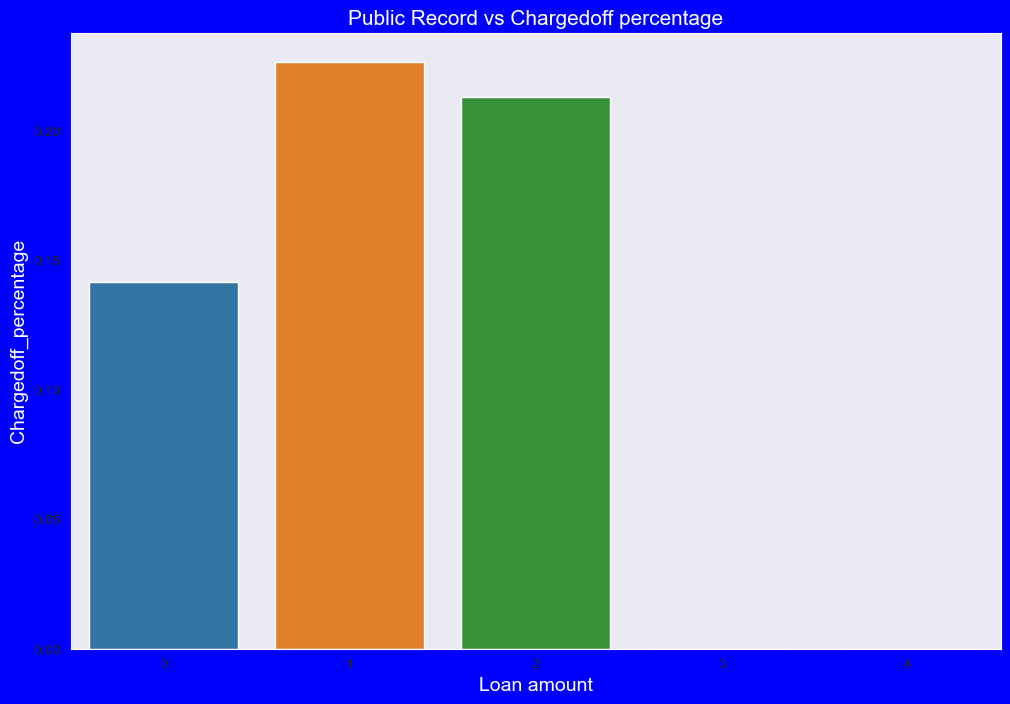

In [85]:
#  Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Public Record vs Chargedoff percentage',fontsize=15,color = 'w')
ax1=sns.barplot(x='pub_rec', y='Chargedoff_percentage', data=loan_loan_amount)
ax1.set_ylabel('Chargedoff_percentage',fontsize=14,color = 'w')
ax1.set_xlabel('Loan amount',fontsize=14,color='w')

plt.show()

# Observations:
# public record range 3-4 has no charged_off
# public record range 0-1 has more chances of charged_off

In [87]:
# Bivariate Analysis on home ownership against Chargedoff_percentage -
loan_loan_amount = loan.groupby(['home_ownership','loan_status']).loan_status.count().unstack().fillna(0).reset_index()

loan_loan_amount['Total'] = loan_loan_amount['Charged Off'] + loan_loan_amount['Fully Paid'] 
loan_loan_amount['Chargedoff_percentage'] = loan_loan_amount['Charged Off'] / loan_loan_amount['Total']
loan_loan_amount.sort_values('Chargedoff_percentage', ascending=False)

# Observations:
# The percentage of charged off for having home rent,own or mortage remains almost same 
# others having 18% of charged off


loan_status home_ownership  Charged Off  Fully Paid    Total  \
2                    OTHER         18.0        78.0     96.0   
4                     RENT       2824.0     15573.0  18397.0   
3                      OWN        440.0      2507.0   2947.0   
0                 MORTGAGE       2302.0     14446.0  16748.0   
1                     NONE          0.0         3.0      3.0   

loan_status  Chargedoff_percentage  
2                         0.187500  
4                         0.153503  
3                         0.149304  
0                         0.137449  
1                         0.000000

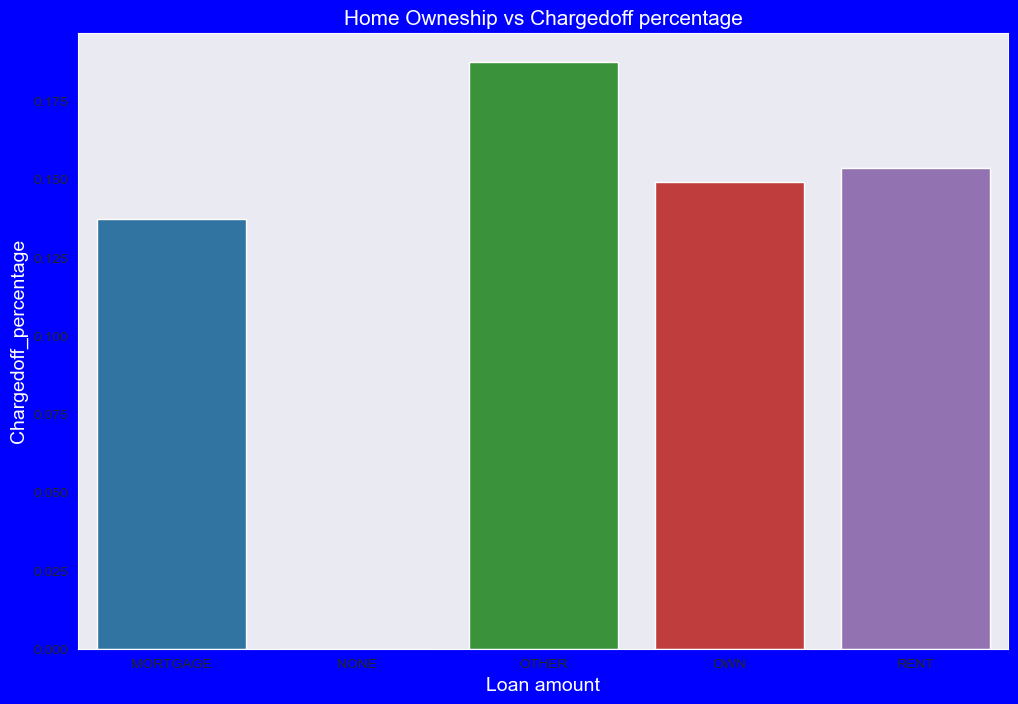

In [88]:
#  Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Home Owneship vs Chargedoff percentage',fontsize=15,color = 'w')
ax1=sns.barplot(x='home_ownership', y='Chargedoff_percentage', data=loan_loan_amount)
ax1.set_ylabel('Chargedoff_percentage',fontsize=14,color = 'w')
ax1.set_xlabel('Loan amount',fontsize=14,color='w')

plt.show()

# Observations:
# The percentage of charged off for having home rent,own or mortage remains almost same 
# others having 18% of charged off


In [89]:
# Bivariate Analysis on year against Chargedoff_percentage -
loan_loan_amount = loan.groupby(['year','loan_status']).loan_status.count().unstack().fillna(0).reset_index()

loan_loan_amount['Total'] = loan_loan_amount['Charged Off'] + loan_loan_amount['Fully Paid'] 
loan_loan_amount['Chargedoff_percentage'] = loan_loan_amount['Charged Off'] / loan_loan_amount['Total']
loan_loan_amount.sort_values('Chargedoff_percentage', ascending=False)

# Observations:
# Highest percentage of charged off(17%) happened in the year 2007
# Next Highest percentage of charged off(15%) happened in the year 2011 and 2008


loan_status  year  Charged Off  Fully Paid  Total  Chargedoff_percentage
0            2007           43         204    247               0.174089
4            2011         3239       17079  20318               0.159415
1            2008          246        1306   1552               0.158505
3            2010         1466        9946  11412               0.128461
2            2009          590        4072   4662               0.126555

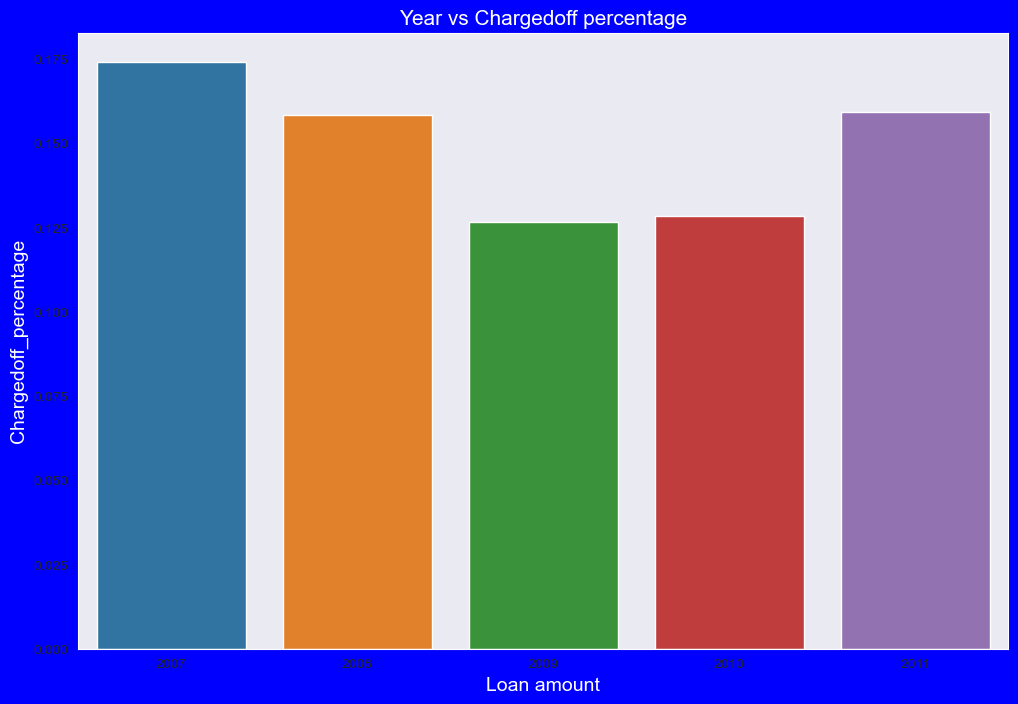

In [90]:
#  Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Year vs Chargedoff percentage',fontsize=15,color = 'w')
ax1=sns.barplot(x='year', y='Chargedoff_percentage', data=loan_loan_amount)
ax1.set_ylabel('Chargedoff_percentage',fontsize=14,color = 'w')
ax1.set_xlabel('Loan amount',fontsize=14,color='w')

plt.show()

# Observations:
# Highest percentage of charged off(17%) happened in the year 2007
# Next Highest percentage of charged off(15%) happened in the year 2011 and 2008


Multivariate Analysis

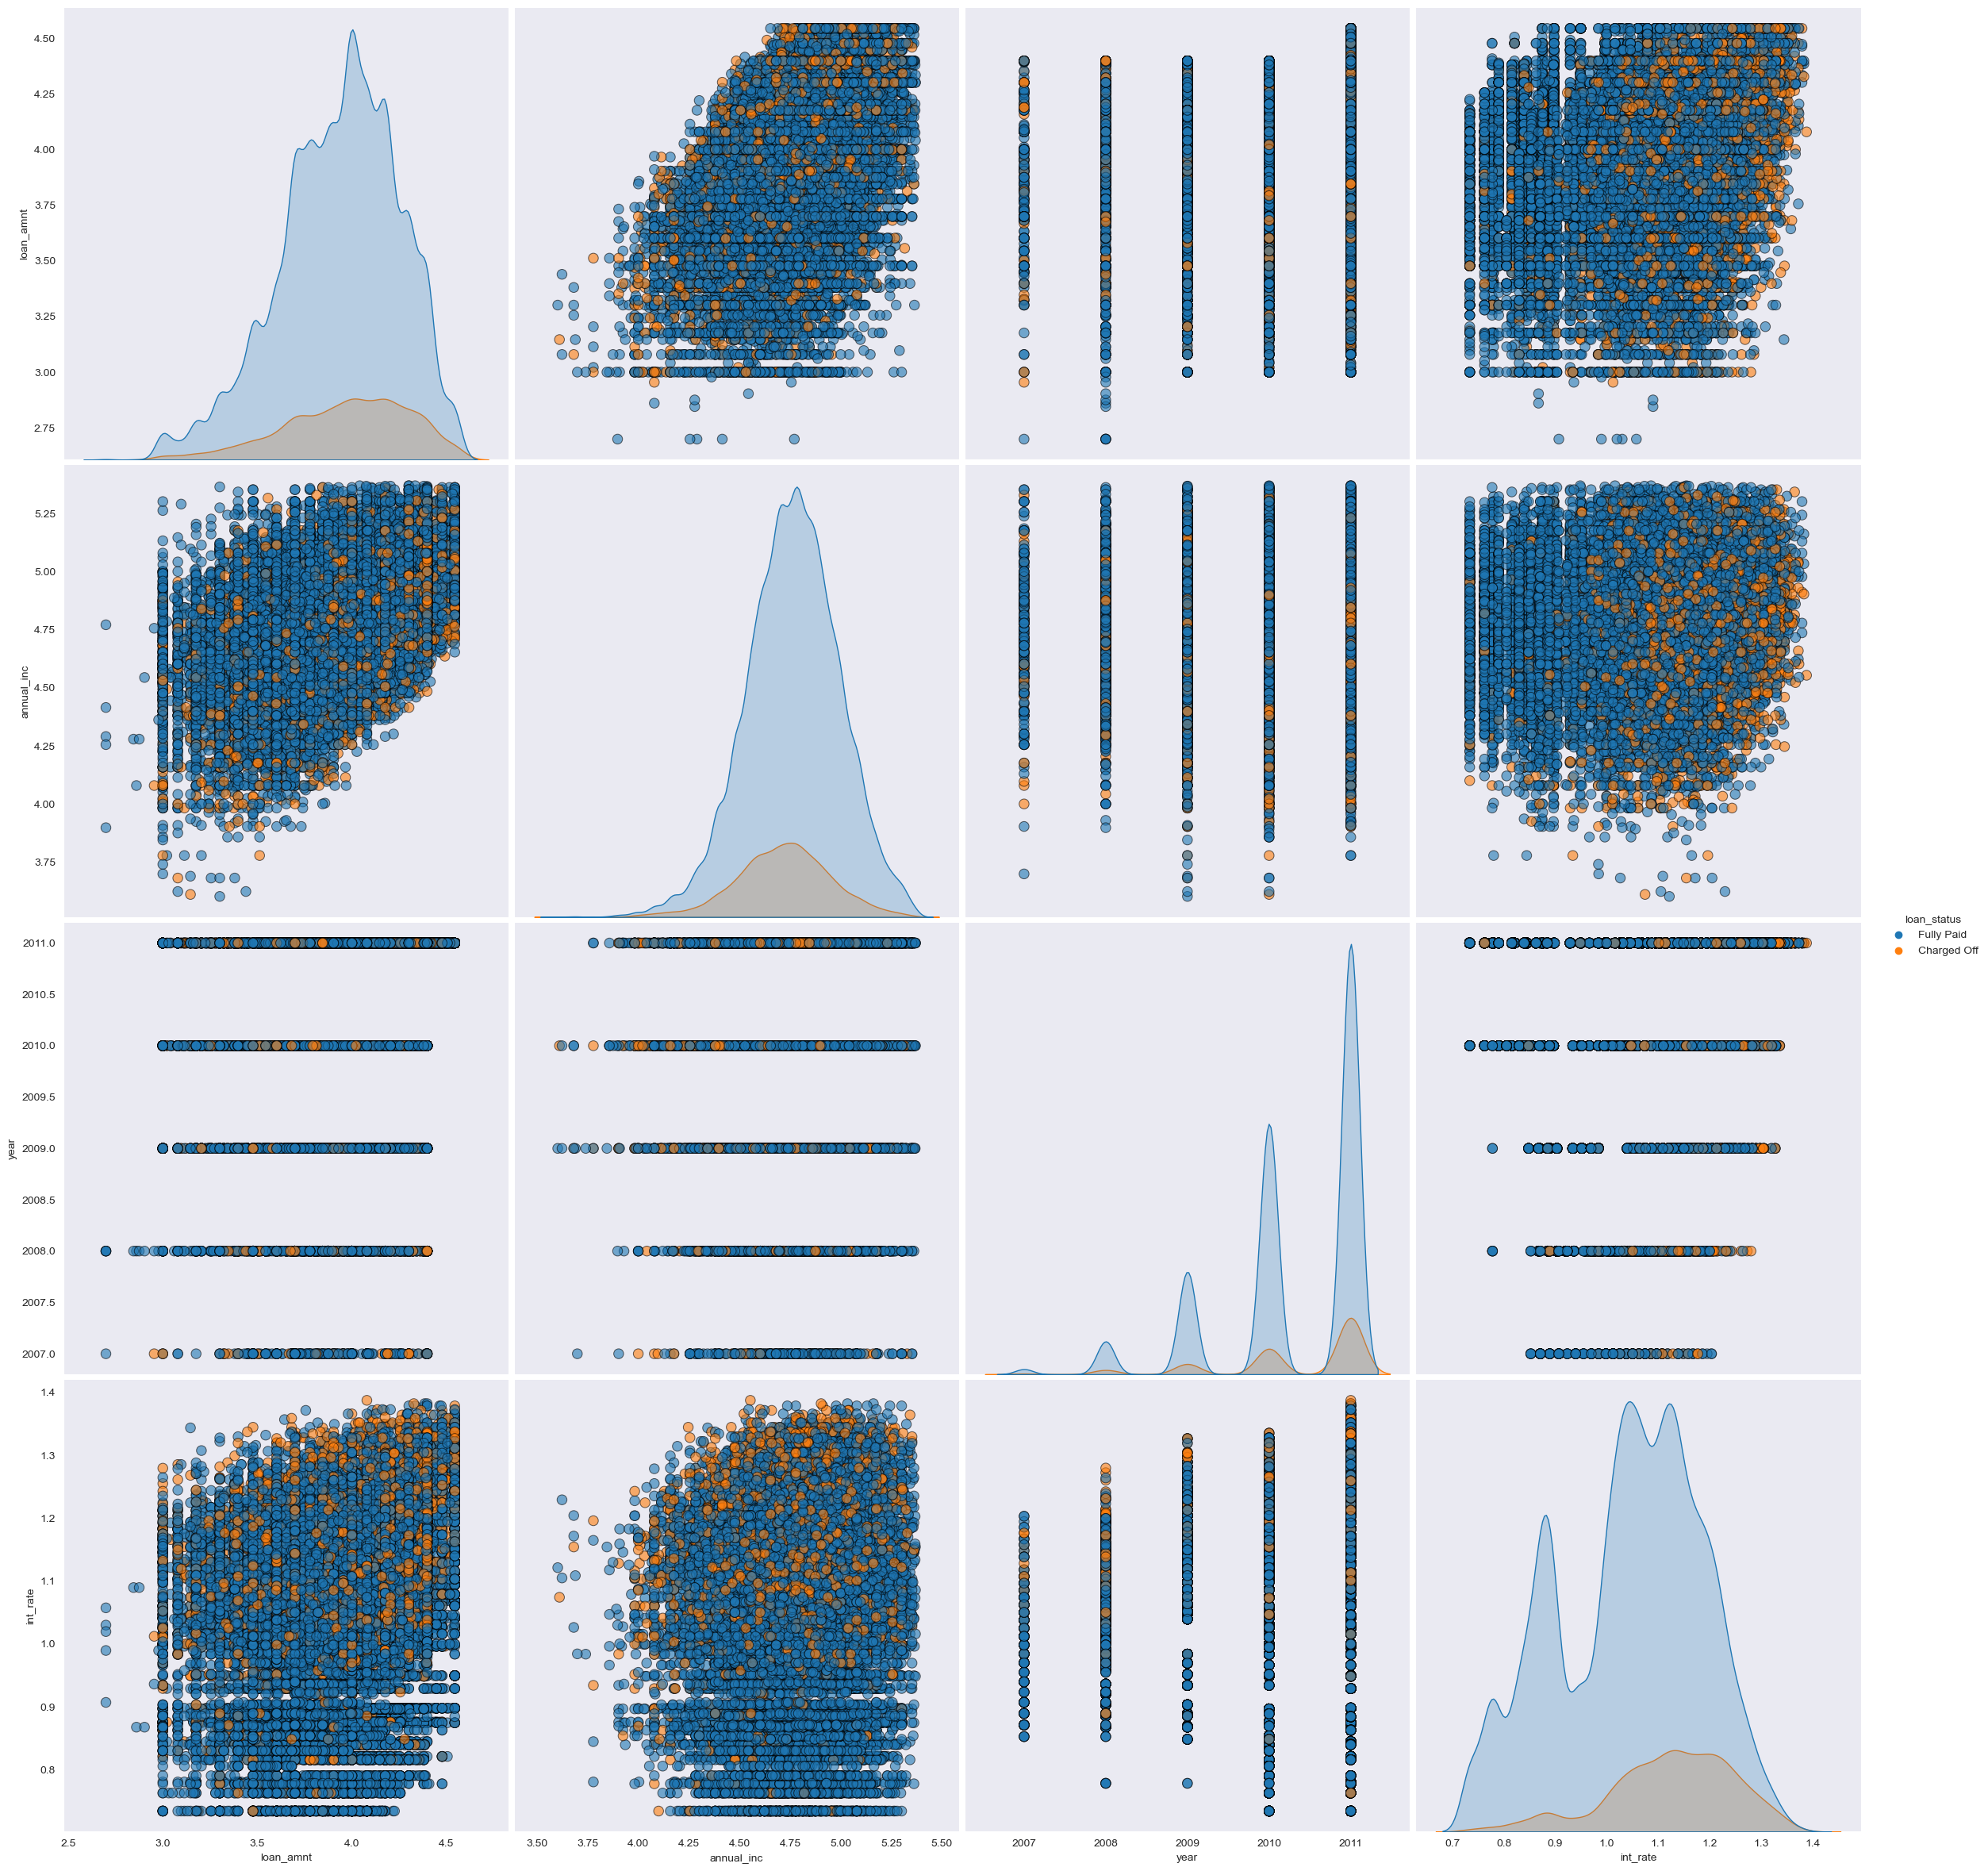

In [86]:
# Lets draw a pair plot for multivariate analysis
# Pick few imporatnt columns from dataset separately.

loan_pair = loan[['loan_amnt', 'annual_inc', 'year','int_rate','loan_status']].copy()
loan_pair.head()

# Take the log of below variables as they are heavily skewed
loan_pair['loan_amnt'] = np.log10(loan_pair['loan_amnt'])
loan_pair['annual_inc'] = np.log10(loan_pair['annual_inc'])
loan_pair['int_rate'] = np.log10(loan_pair['int_rate'])

# # Create a pair plot colored by loan status with a density plot of the # diagonal and format the scatter plots.
sns.pairplot(loan_pair, hue = 'loan_status', diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 6)

# Observation:
# Higher the interest rate higher charged off ratio
# Higher the annual income higher the loan amount slightly.

# interest rate is increasing with loan amount increase

